# Customer Segmentation based on Online Purchase Behavior - Kmeans Clustering

Notebook structure

1. Import necessary libraries

2. Import required dataset and perform baseline EDA

3. Feature Engineering

4. Model Development

5. Model Evaluation

6. Feature Optimization for Clusters

7. Cluster Analysis


# 1. Import necessary libraries

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale = 1.3)
%matplotlib inline

# 2. Import required dataset and perform baseline EDA

In [132]:
data = pd.read_csv('shopping_behavior_updated.csv')
data.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually

In [133]:
data.shape

(3900, 18)

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [135]:
# visualize the statistical distribution of numerical features
data.describe()

Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000

In [136]:
# visualize the statistical distribution of categorical features
data.describe(include='O')

Gender Item Purchased  Category Location  Size  Color  Season  \
count    3900           3900      3900     3900  3900   3900    3900   
unique      2             25         4       50     4     25       4   
top      Male         Blouse  Clothing  Montana     M  Olive  Spring   
freq     2652            171      1737       96  1755    177     999   

       Subscription Status  Shipping Type Discount Applied Promo Code Used  \
count                 3900           3900             3900            3900   
unique                   2              6                2               2   
top                     No  Free Shipping               No              No   
freq                  2847            675             2223            2223   

       Payment Method Frequency of Purchases  
count            3900                   3900  
unique              6                      7  
top            PayPal         Every 3 Months  
freq              677                    584

In [137]:
# Segregating the columns into numerical and categorical features

# numerical features
numerical_features = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

# categorical features
categorical_features = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
                         'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied',
                         'Promo Code Used', 'Payment Method', 'Frequency of Purchases']

Exploring Gender:



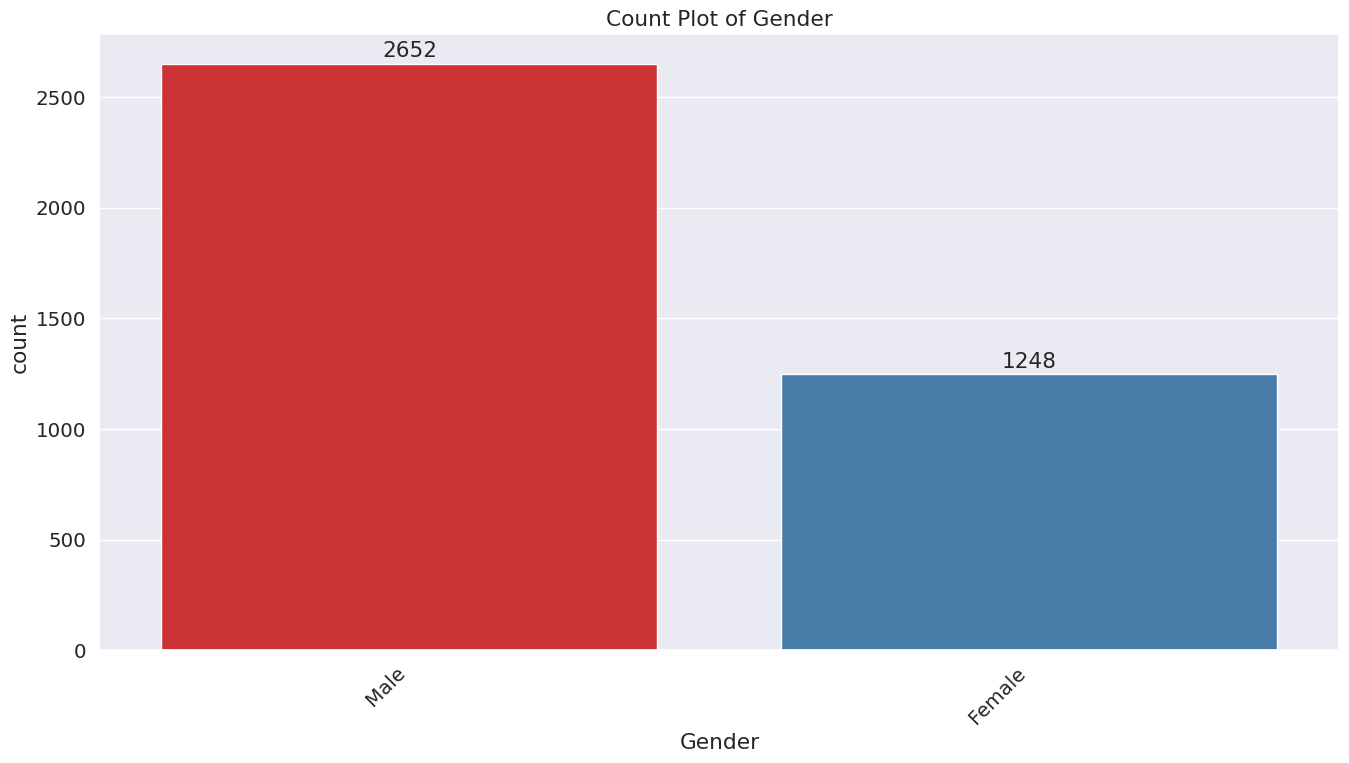

Percentage Distribution:
Gender
Male      68.0
Female    32.0
Name: proportion, dtype: float64


Exploring Item Purchased:



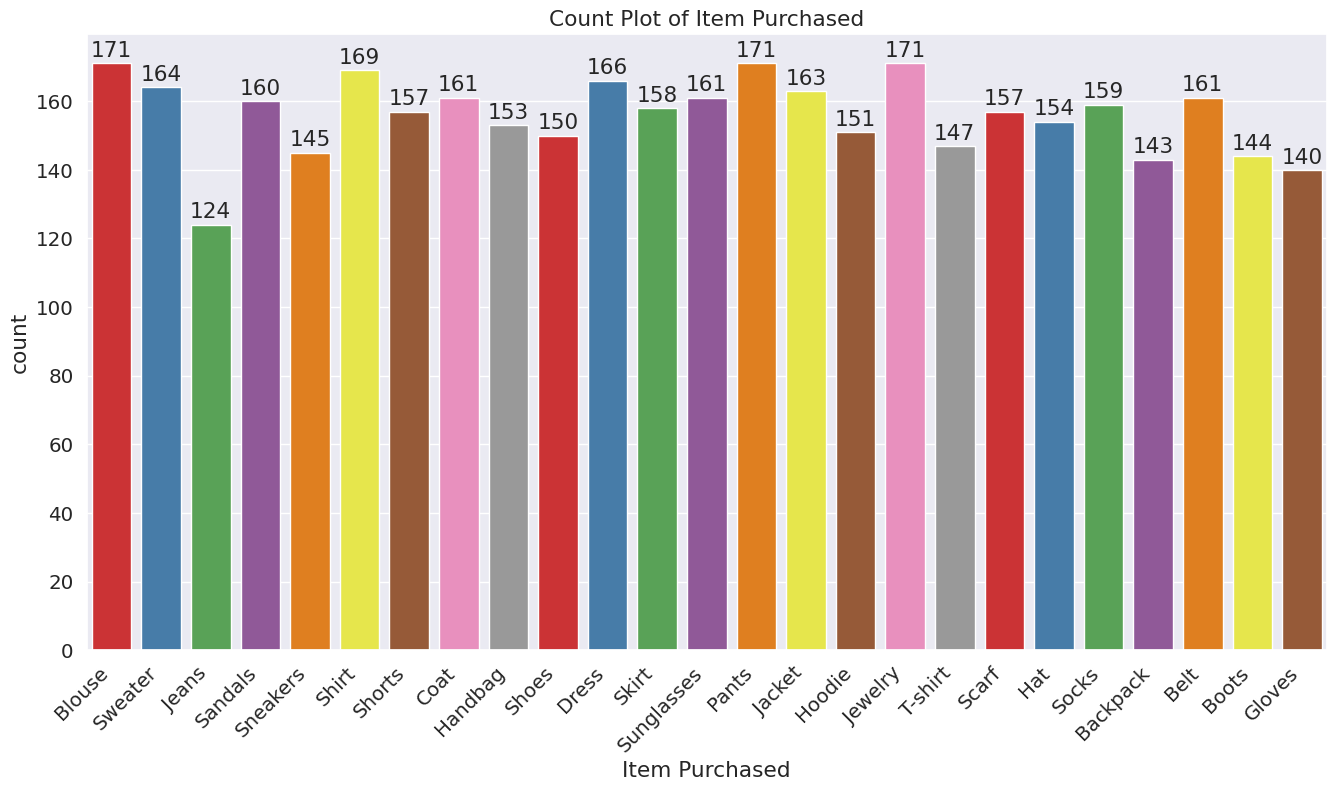

Percentage Distribution:
Item Purchased
Blouse        4.384615
Jewelry       4.384615
Pants         4.384615
Shirt         4.333333
Dress         4.256410
Sweater       4.205128
Jacket        4.179487
Belt          4.128205
Sunglasses    4.128205
Coat          4.128205
Sandals       4.102564
Socks         4.076923
Skirt         4.051282
Shorts        4.025641
Scarf         4.025641
Hat           3.948718
Handbag       3.923077
Hoodie        3.871795
Shoes         3.846154
T-shirt       3.769231
Sneakers      3.717949
Boots         3.692308
Backpack      3.666667
Gloves        3.589744
Jeans         3.179487
Name: proportion, dtype: float64


Exploring Category:



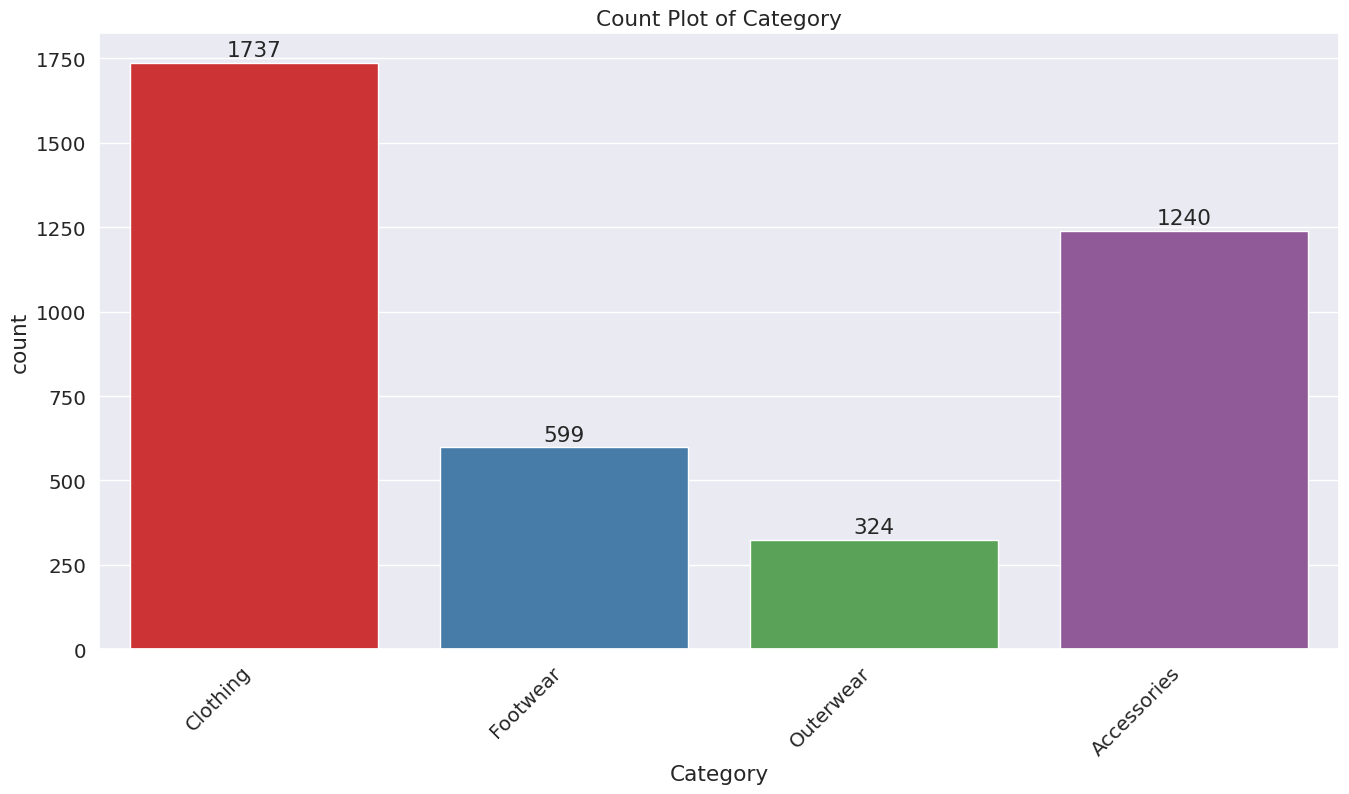

Percentage Distribution:
Category
Clothing       44.538462
Accessories    31.794872
Footwear       15.358974
Outerwear       8.307692
Name: proportion, dtype: float64


Exploring Location:



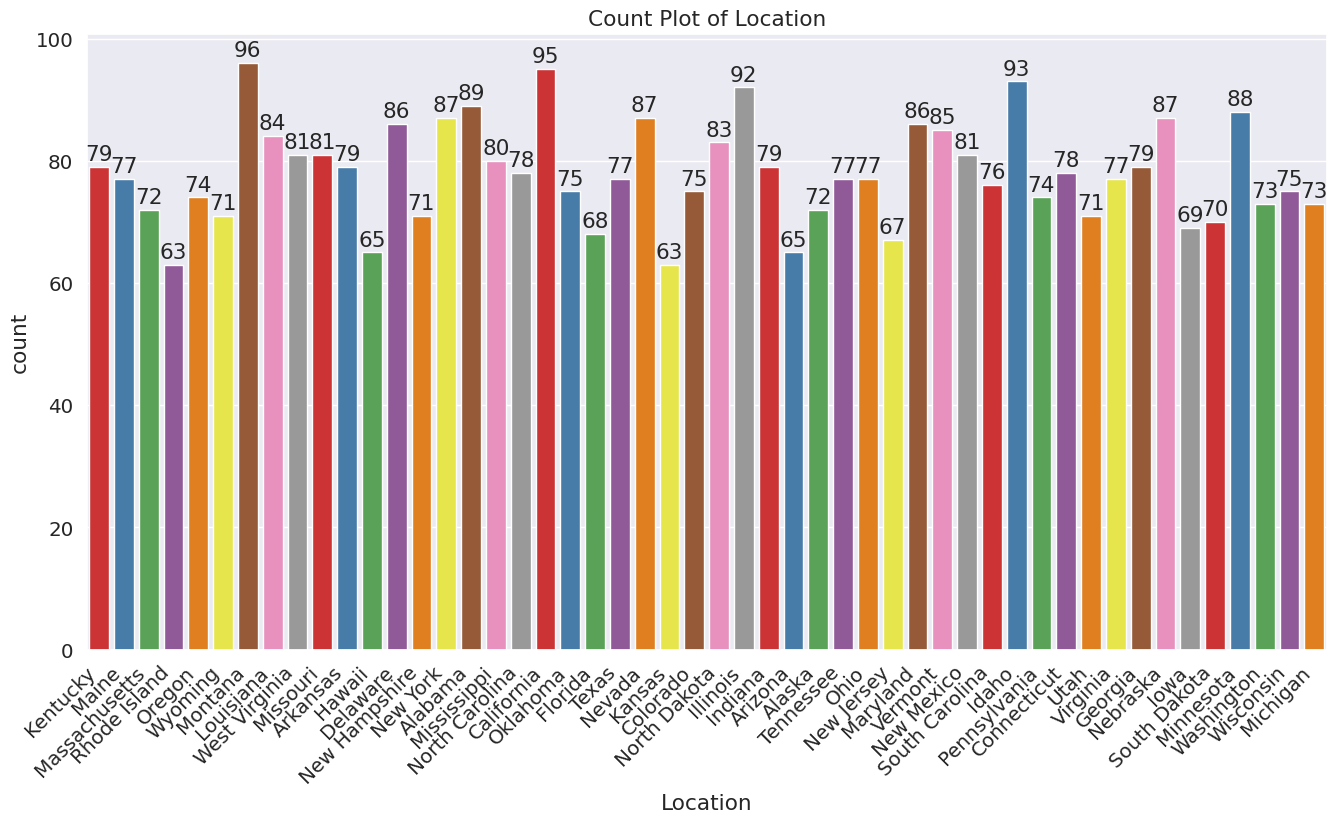

Percentage Distribution:
Location
Montana           2.461538
California        2.435897
Idaho             2.384615
Illinois          2.358974
Alabama           2.282051
Minnesota         2.256410
Nebraska          2.230769
New York          2.230769
Nevada            2.230769
Maryland          2.205128
Delaware          2.205128
Vermont           2.179487
Louisiana         2.153846
North Dakota      2.128205
Missouri          2.076923
West Virginia     2.076923
New Mexico        2.076923
Mississippi       2.051282
Indiana           2.025641
Georgia           2.025641
Kentucky          2.025641
Arkansas          2.025641
North Carolina    2.000000
Connecticut       2.000000
Virginia          1.974359
Ohio              1.974359
Tennessee         1.974359
Texas             1.974359
Maine             1.974359
South Carolina    1.948718
Colorado          1.923077
Oklahoma          1.923077
Wisconsin         1.923077
Oregon            1.897436
Pennsylvania      1.897436
Washington        1.8

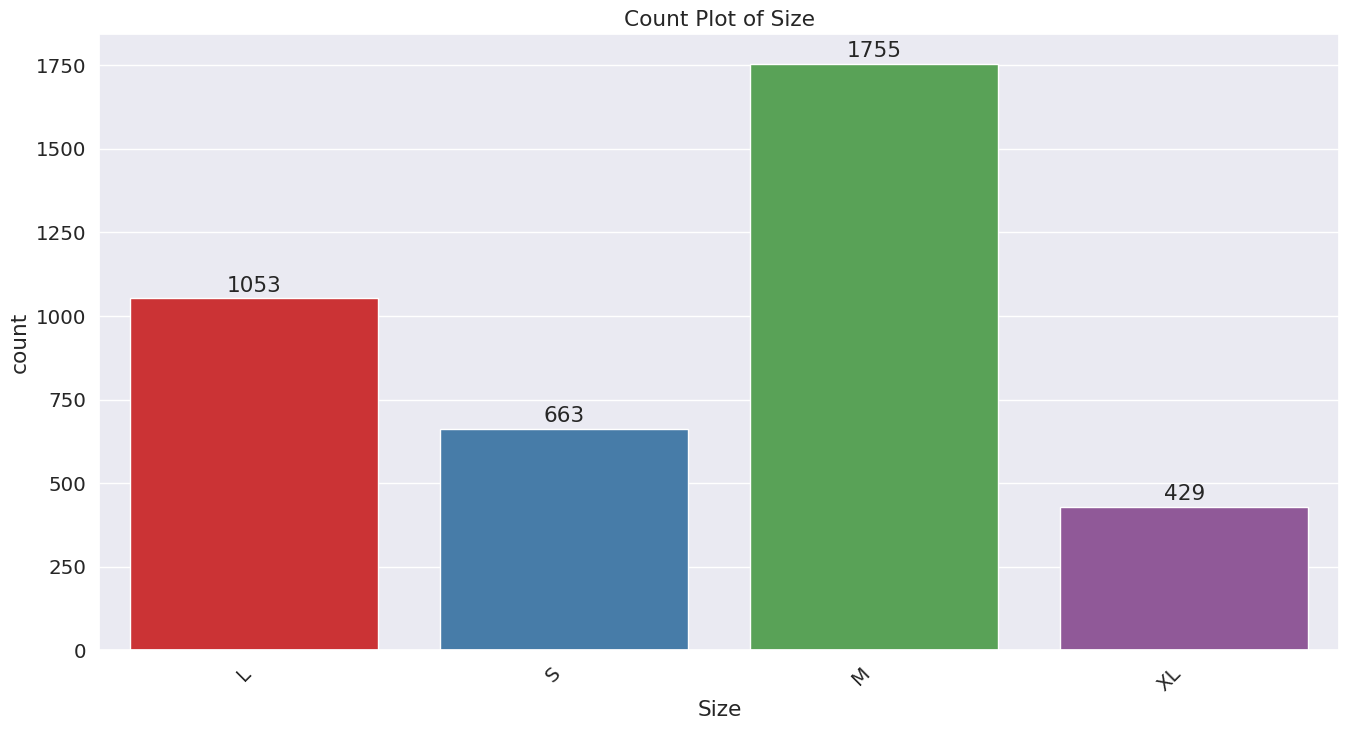

Percentage Distribution:
Size
M     45.0
L     27.0
S     17.0
XL    11.0
Name: proportion, dtype: float64


Exploring Color:



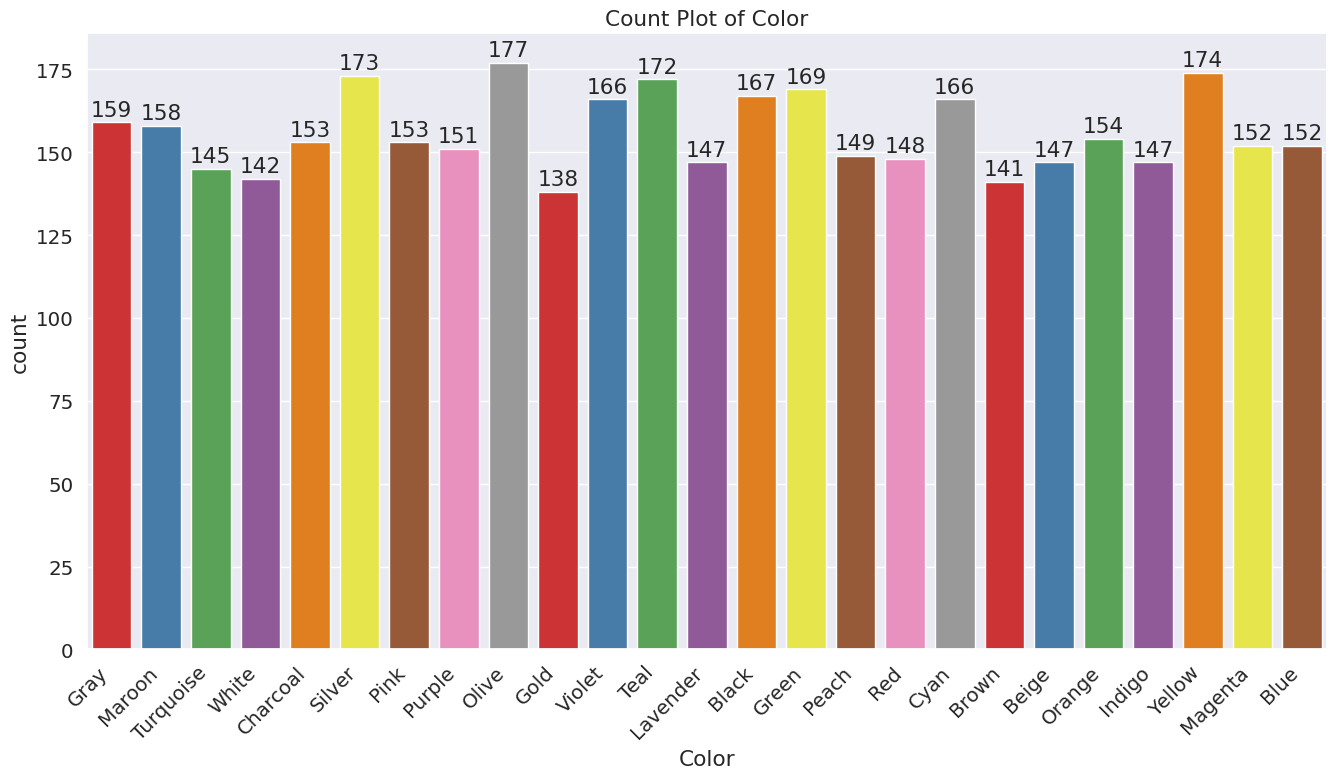

Percentage Distribution:
Color
Olive        4.538462
Yellow       4.461538
Silver       4.435897
Teal         4.410256
Green        4.333333
Black        4.282051
Cyan         4.256410
Violet       4.256410
Gray         4.076923
Maroon       4.051282
Orange       3.948718
Charcoal     3.923077
Pink         3.923077
Magenta      3.897436
Blue         3.897436
Purple       3.871795
Peach        3.820513
Red          3.794872
Beige        3.769231
Indigo       3.769231
Lavender     3.769231
Turquoise    3.717949
White        3.641026
Brown        3.615385
Gold         3.538462
Name: proportion, dtype: float64


Exploring Season:



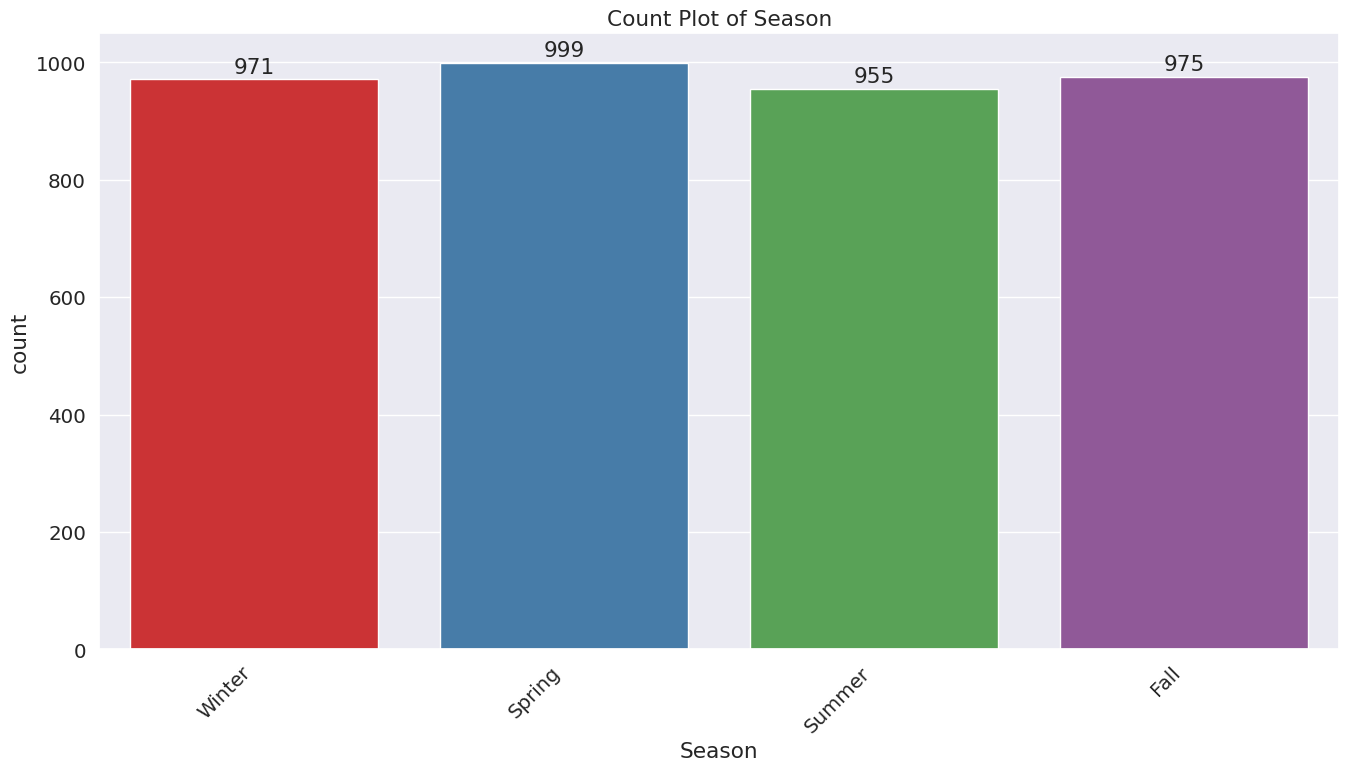

Percentage Distribution:
Season
Spring    25.615385
Fall      25.000000
Winter    24.897436
Summer    24.487179
Name: proportion, dtype: float64


Exploring Subscription Status:



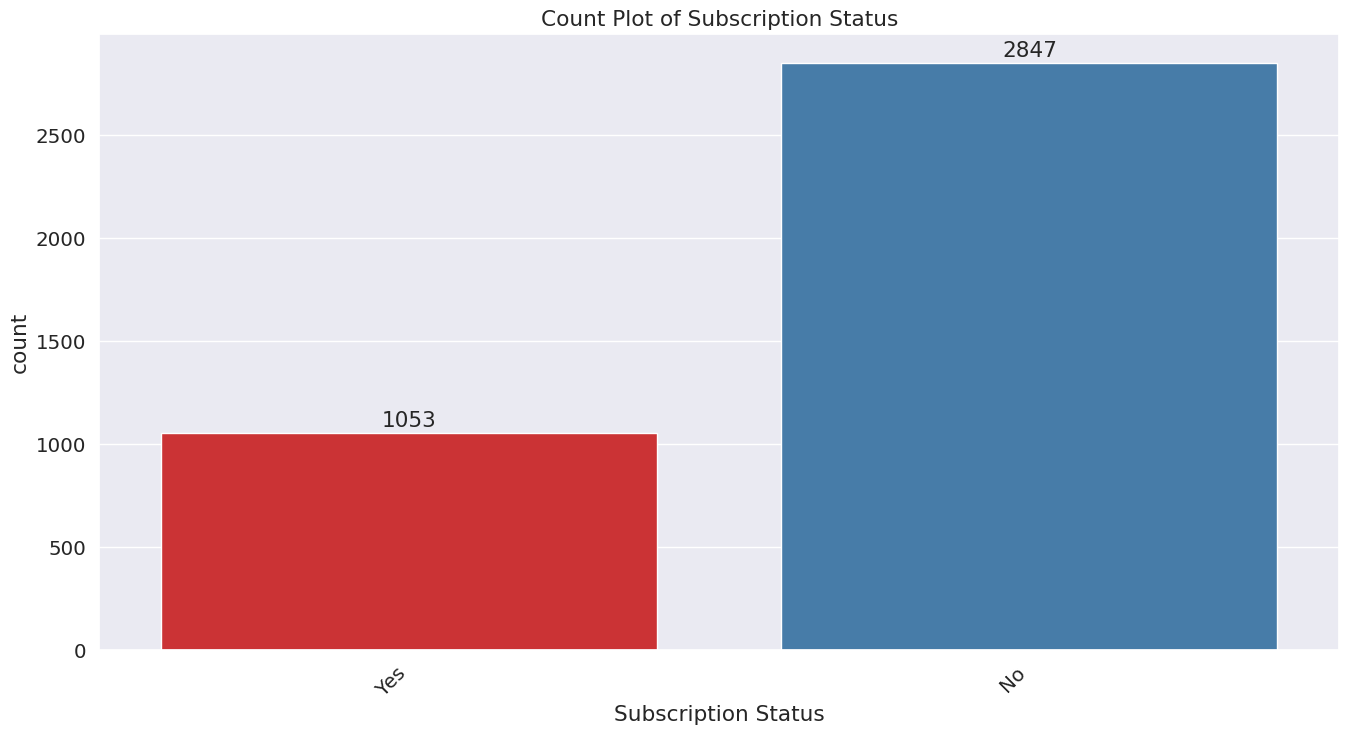

Percentage Distribution:
Subscription Status
No     73.0
Yes    27.0
Name: proportion, dtype: float64


Exploring Shipping Type:



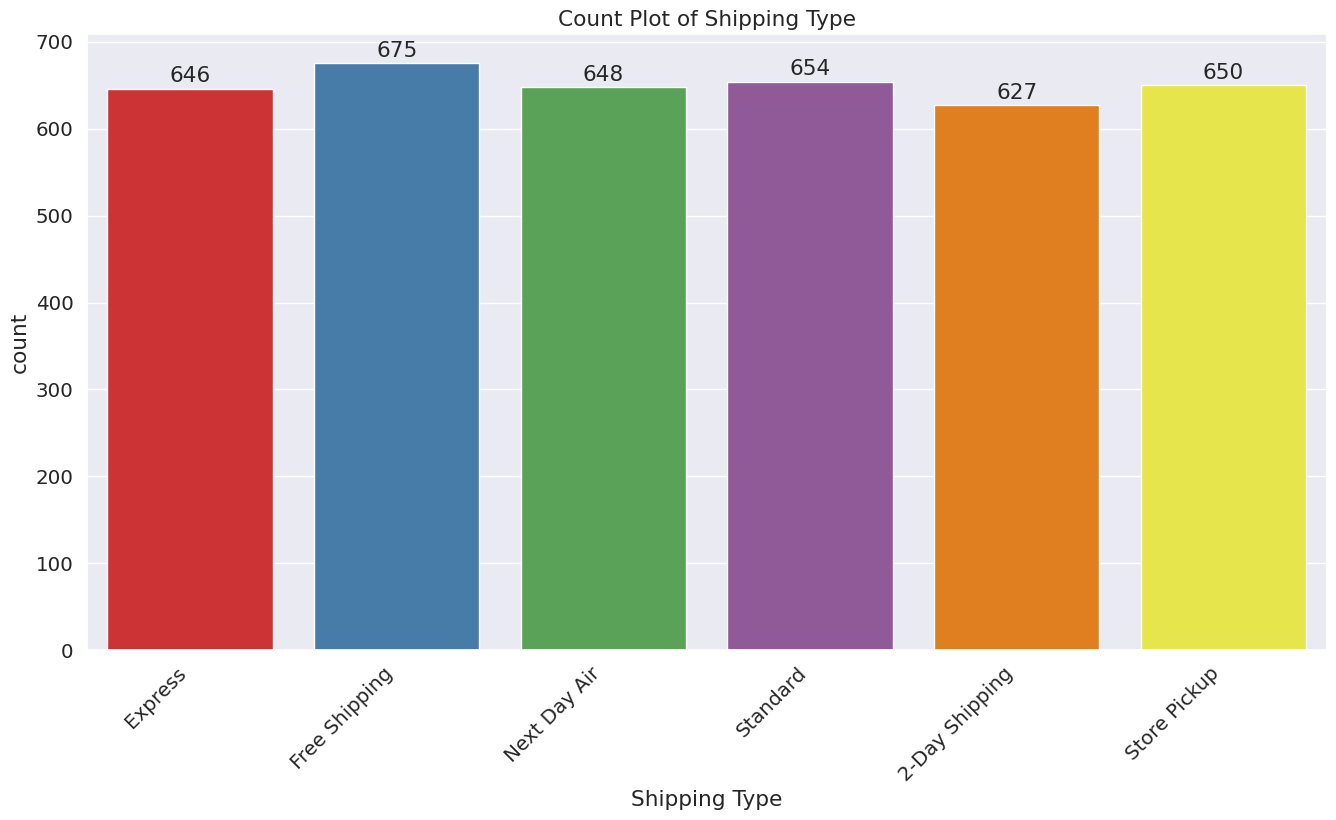

Percentage Distribution:
Shipping Type
Free Shipping     17.307692
Standard          16.769231
Store Pickup      16.666667
Next Day Air      16.615385
Express           16.564103
2-Day Shipping    16.076923
Name: proportion, dtype: float64


Exploring Discount Applied:



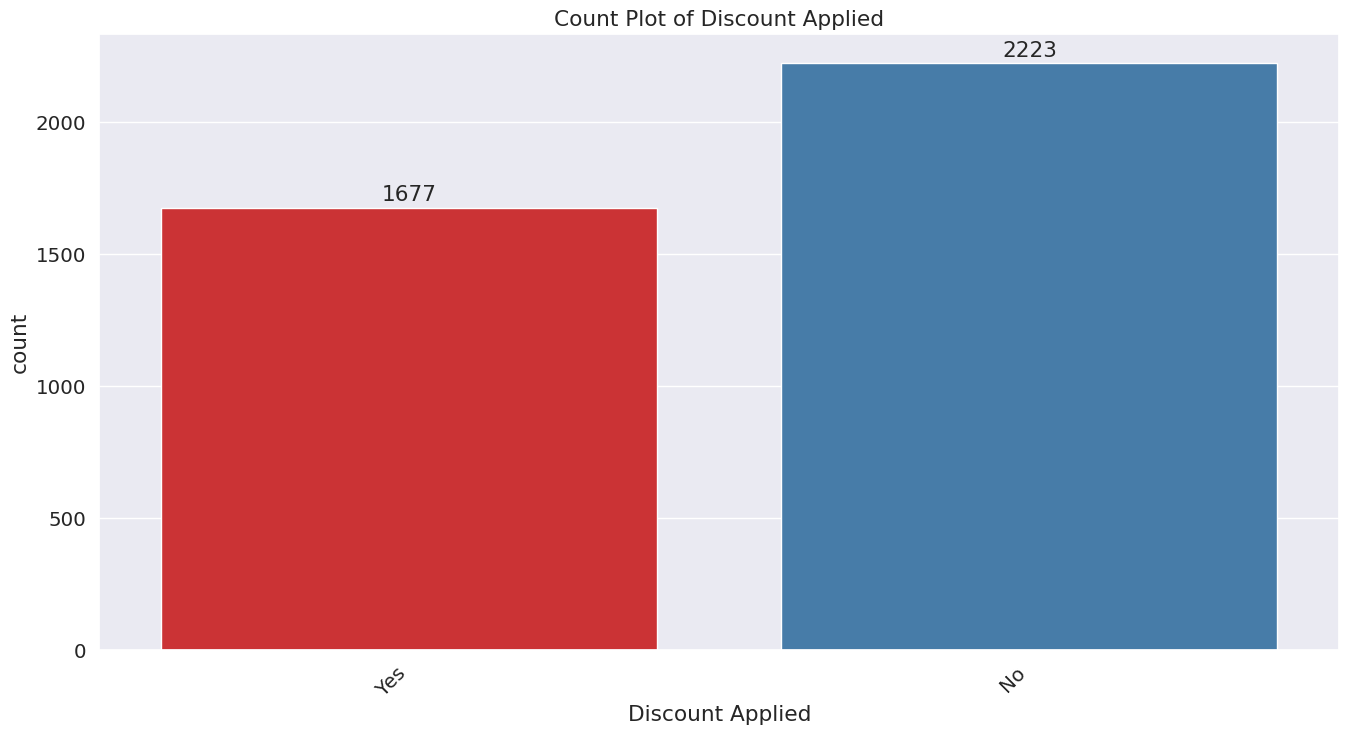

Percentage Distribution:
Discount Applied
No     57.0
Yes    43.0
Name: proportion, dtype: float64


Exploring Promo Code Used:



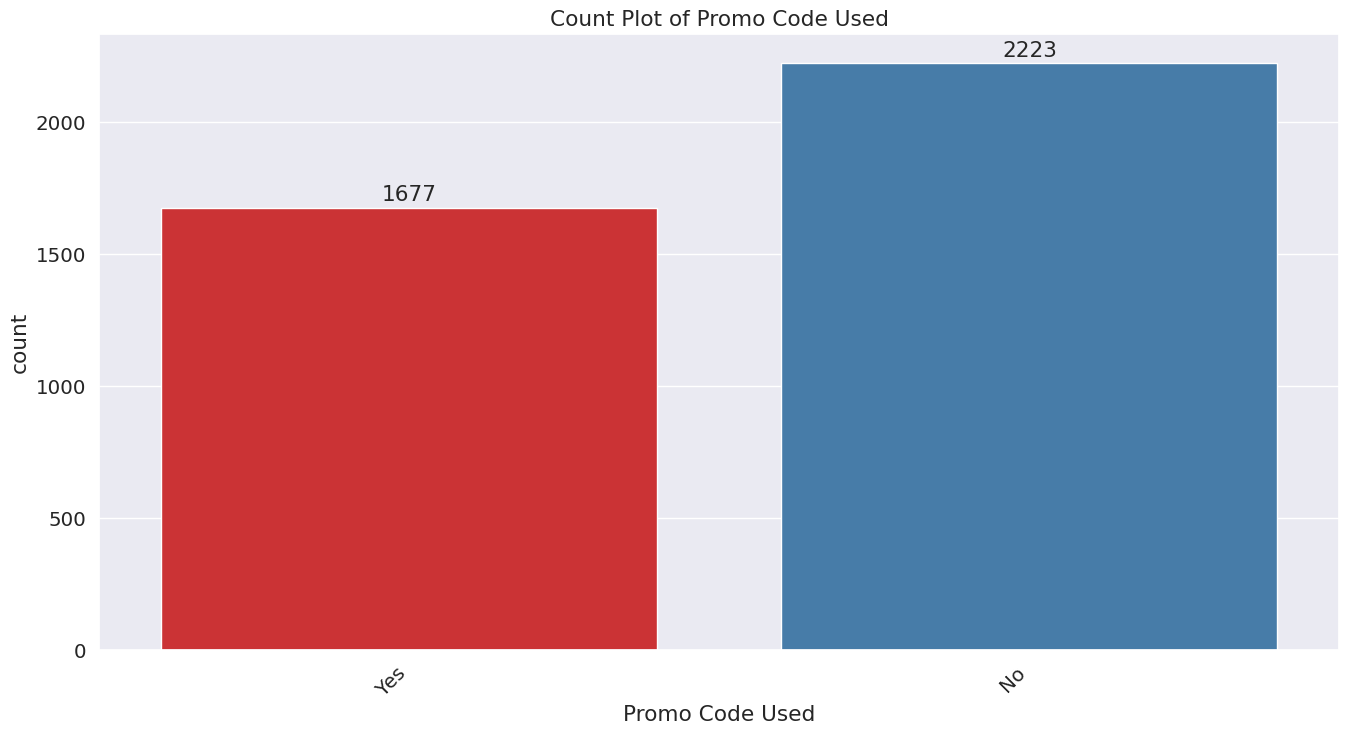

Percentage Distribution:
Promo Code Used
No     57.0
Yes    43.0
Name: proportion, dtype: float64


Exploring Payment Method:



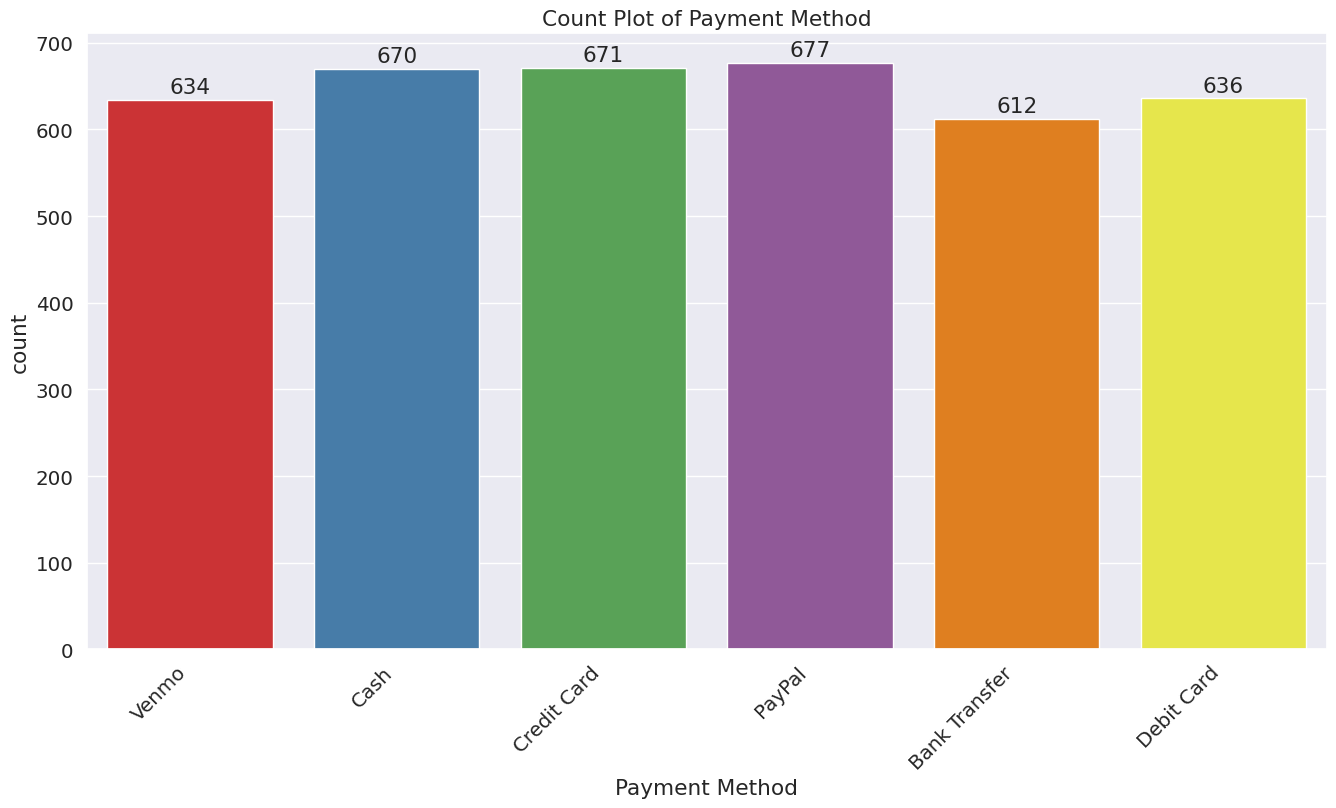

Percentage Distribution:
Payment Method
PayPal           17.358974
Credit Card      17.205128
Cash             17.179487
Debit Card       16.307692
Venmo            16.256410
Bank Transfer    15.692308
Name: proportion, dtype: float64


Exploring Frequency of Purchases:



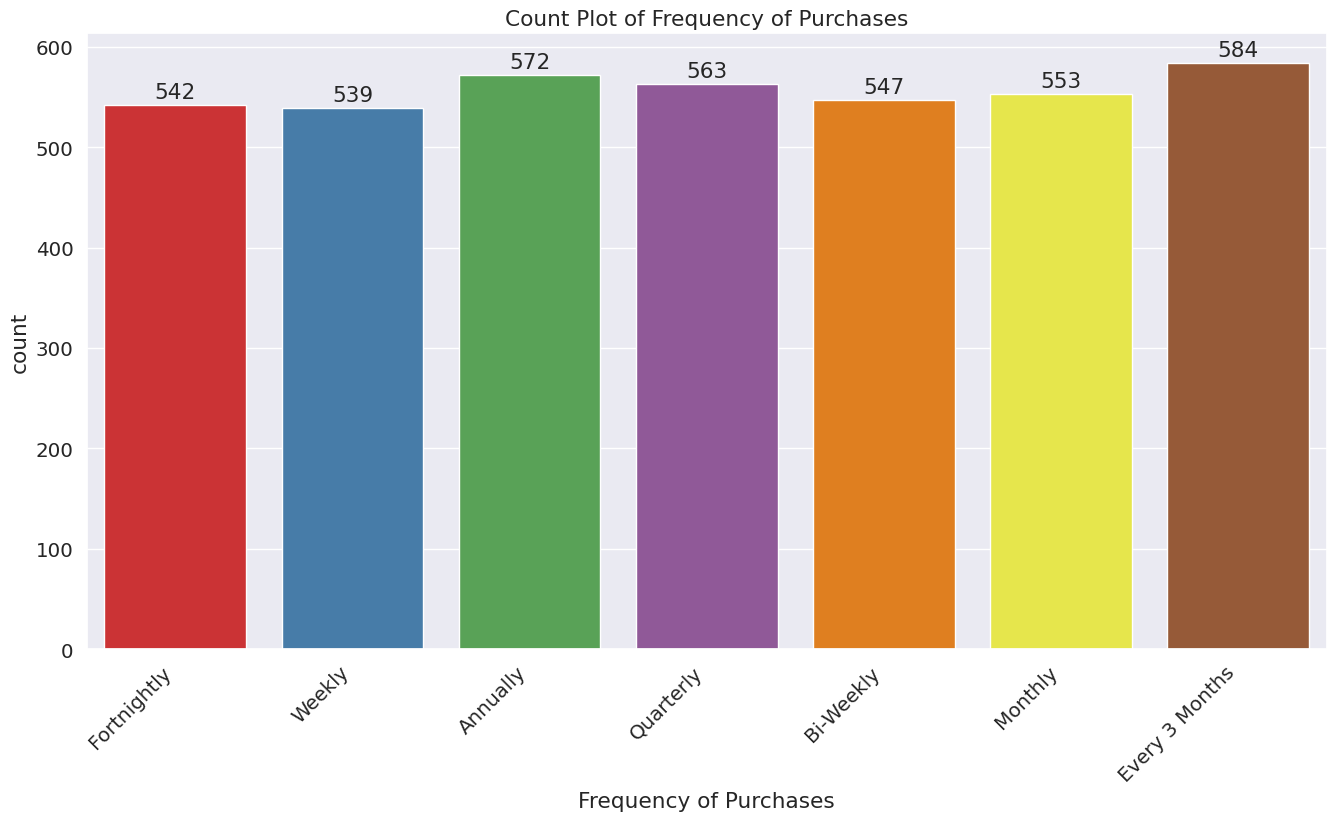

Percentage Distribution:
Frequency of Purchases
Every 3 Months    14.974359
Annually          14.666667
Quarterly         14.435897
Monthly           14.179487
Bi-Weekly         14.025641
Fortnightly       13.897436
Weekly            13.820513
Name: proportion, dtype: float64




In [138]:
# Univariate analysis and visualization of the categorical features

for column in categorical_features:
    print(f"Exploring {column}:\n")

    # Count plot
    plt.figure(figsize=(16, 8))
    plt.xticks(rotation=45, ha='right')
    plot = sns.countplot(x=column, data=data, palette='Set1')
    plt.title(f'Count Plot of {column}')

    # Adding annotation on top of the bars
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),
                      textcoords = 'offset points')

    plt.show()

    # Percentage distribution
    column_dist = data[column].value_counts(normalize=True) * 100
    print("Percentage Distribution:")
    print(column_dist)
    print("\n")

Exploring Age:

Missing Values: 0
Data Type: int64
Basic Statistics:
count    3900.000000
mean       44.068462
std        15.207589
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64


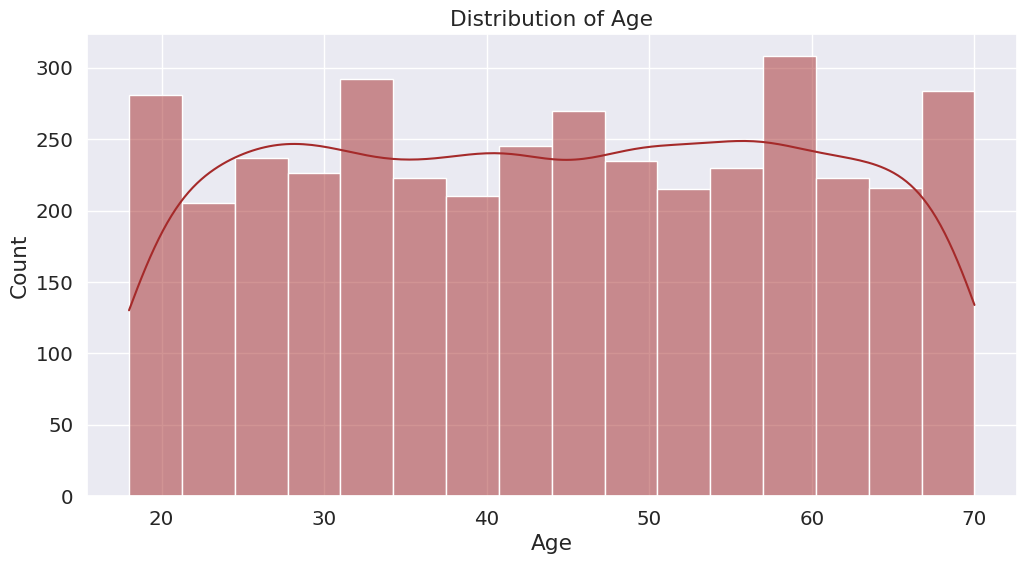



Exploring Purchase Amount (USD):

Missing Values: 0
Data Type: int64
Basic Statistics:
count    3900.000000
mean       59.764359
std        23.685392
min        20.000000
25%        39.000000
50%        60.000000
75%        81.000000
max       100.000000
Name: Purchase Amount (USD), dtype: float64


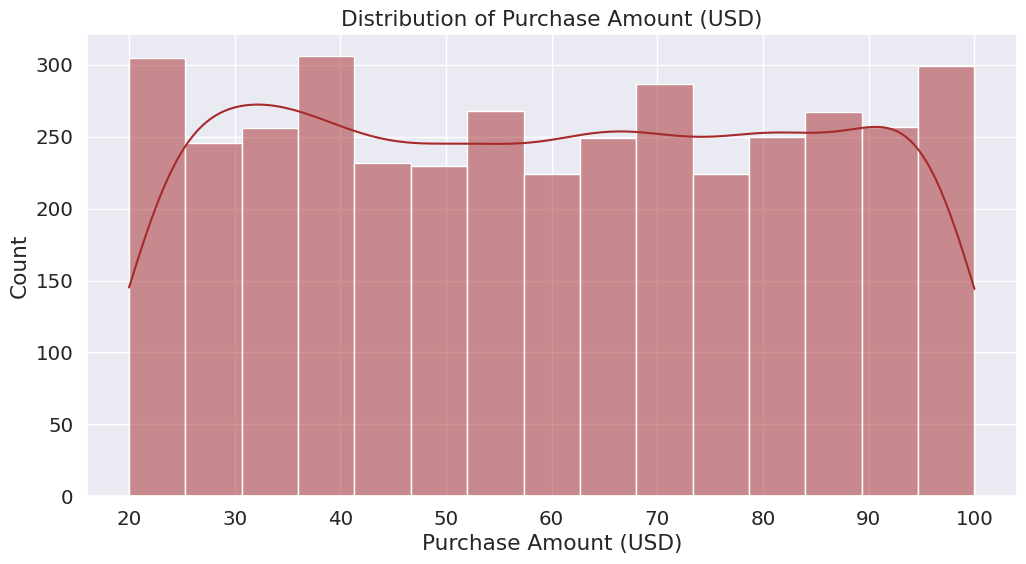



Exploring Review Rating:

Missing Values: 0
Data Type: float64
Basic Statistics:
count    3900.000000
mean        3.749949
std         0.716223
min         2.500000
25%         3.100000
50%         3.700000
75%         4.400000
max         5.000000
Name: Review Rating, dtype: float64


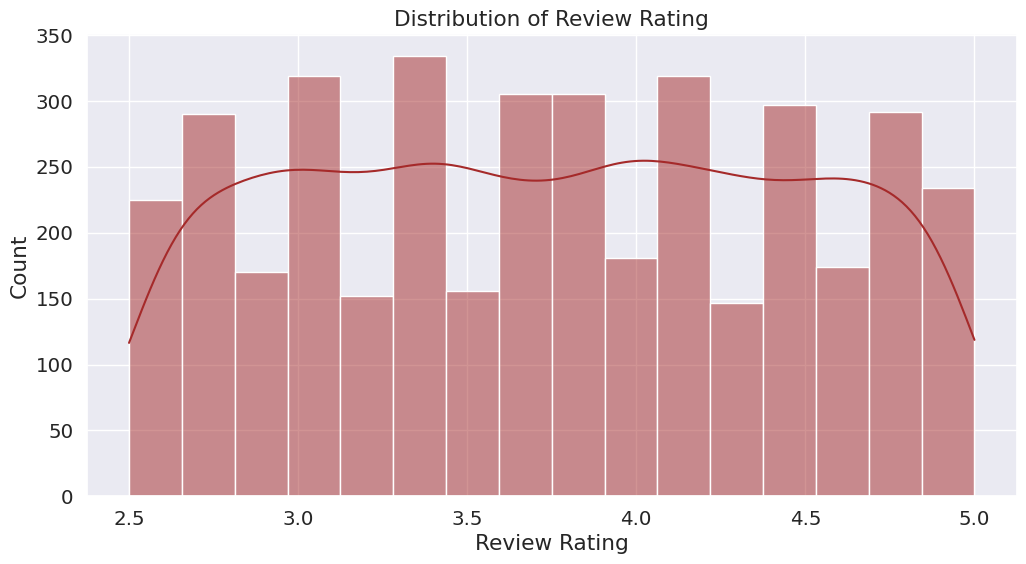



Exploring Previous Purchases:

Missing Values: 0
Data Type: int64
Basic Statistics:
count    3900.000000
mean       25.351538
std        14.447125
min         1.000000
25%        13.000000
50%        25.000000
75%        38.000000
max        50.000000
Name: Previous Purchases, dtype: float64


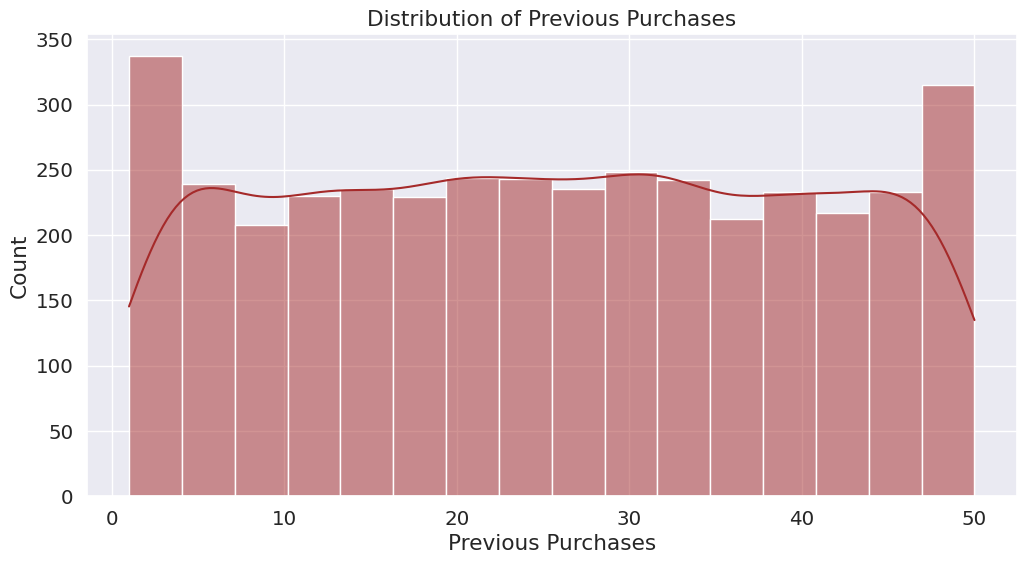

In [139]:
# Univariate analysis and visualization of the numerical features

# Explore each column
for column in numerical_features:
    print(f"Exploring {column}:\n")

    # Check for missing values
    missing_count = data[column].isnull().sum()
    print("Missing Values:", missing_count)

    # Data type
    data_type = data[column].dtype
    print("Data Type:", data_type)

    # Basic statistics
    column_stats = data[column].describe()
    print("Basic Statistics:")
    print(column_stats)

    # Count plot (for categorical columns)
    if data_type == 'object':
        plt.figure(figsize=(6, 4))
        sns.countplot(x=column, data=data)
        plt.title(f'Count Plot of {column}')
        plt.xticks(rotation=45)
        plt.show()
    # Distribution plot (for numerical columns)
    else:
        plt.figure(figsize=(12, 6))
        sns.histplot(data=data, x=column, kde=True , color = 'brown')
        plt.title(f'Distribution of {column}')
        plt.show()

    print("\n")


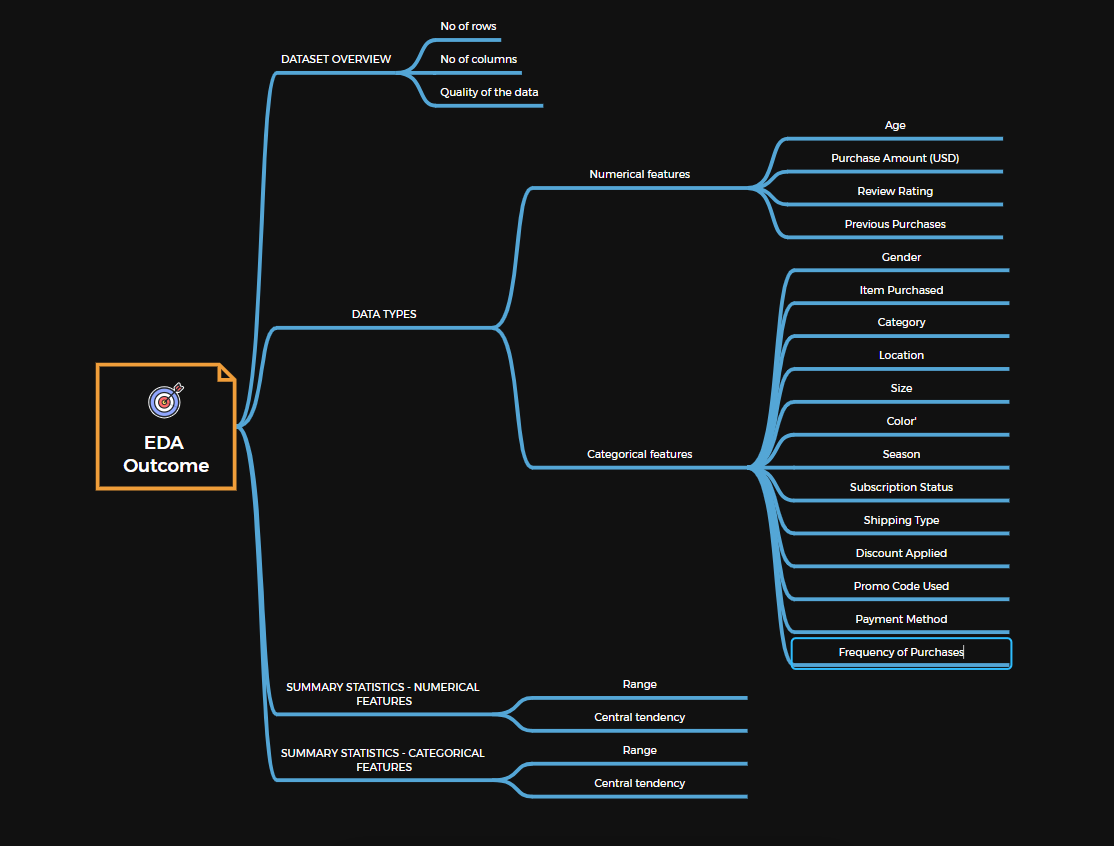

Results from Exploratory Data Analysis

1. Dataset Overview:

a. The dataset contains 3900 entries.

b. There are 18 columns in the dataset.

c. No missing values are present in any of the columns, as the non-null counts for each column are equal to the total number of entries (3900).

2. Data Types:

a. The dataset includes integer (int64), float (float64), and object (categorical) data types.

b. Numerical features: 'Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases'.

c. Categorical features: 'Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases'.

3. Summary Statistics of Numerical Features:

a. Customer age ranges from 18 to 70, with a mean age of approximately 44 years.

b. Purchase amounts range from 20 to 100 dollars, with a mean of approximately $59.76.

c. Review ratings range from 2.5 to 5.0, with a mean rating of approximately 3.75.

d. The number of previous purchases ranges from 1 to 50, with a mean of approximately 25.35.

4. Summary Statistics of Categorical Features:

a. 'Gender': Two unique values (Male, Female), with 'Male' being the most frequent (2652 occurrences).

b. 'Item Purchased': 25 unique items, with 'Blouse' being the most frequent (171 occurrences).

c. 'Category': 4 unique categories, with 'Clothing' being the most frequent (1737 occurrences).

d. 'Location': 50 unique locations, with 'Montana' being the most frequent (96 occurrences).

e. 'Size': 4 unique sizes, with 'M' being the most frequent (1755 occurrences).
'Color': 25 unique colors, with 'Olive' being the most frequent (177 occurrences).

f. 'Season': 4 unique seasons, with 'Spring' being the most frequent (999 occurrences).

g. 'Subscription Status': Two unique values ('Yes', 'No'), with 'No' being the most frequent (2847 occurrences).

h. 'Shipping Type': 6 unique types, with 'Free Shipping' being the most frequent (675 occurrences).

i. 'Discount Applied': Two unique values ('Yes', 'No'), with 'No' being the most frequent (2223 occurrences).

j. 'Promo Code Used': Two unique values ('Yes', 'No'), with 'No' being the most frequent (2223 occurrences).

k. 'Payment Method': 6 unique methods, with 'PayPal' being the most frequent (677 occurrences).

l. 'Frequency of Purchases': 7 unique frequencies, with 'Every 3 Months' being the most frequent (584 occurrences).



# 3. Feature Engineering

Label encoding categorical features

In [140]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

data_encoded = data.copy()

label_encoder = LabelEncoder()

for feature in categorical_features:
    data_encoded[feature] = label_encoder.fit_transform(data_encoded[feature])


# Review the preprocessed data
print("Preprocessed Data:")
data_encoded.head()

Preprocessed Data:


Customer ID  Age  Gender  Item Purchased  Category  Purchase Amount (USD)  \
0            1   55       1               2         1                     53   
1            2   19       1              23         1                     64   
2            3   50       1              11         1                     73   
3            4   21       1              14         2                     90   
4            5   45       1               2         1                     49   

   Location  Size  Color  Season  Review Rating  Subscription Status  \
0        16     0      7       3            3.1                    1   
1        18     0     12       3            3.1                    1   
2        20     2     12       1            3.1                    1   
3        38     1     12       1            3.5                    1   
4        36     1     21       1            2.7                    1   

   Shipping Type  Discount Applied  Promo Code Used  Previous Purchases  \
0              1                 1                1                  14   
1              1                 1                1                   2   
2              2                 1                1                  23   
3              3                 1                1                  49   
4              2                 1                1                  31   

   Payment Method  Frequency of Purchases  
0               5                       3  
1               1                       3  
2               2                       6  
3               4                       6  
4               4                       0

Data scaling of all types of features

In [141]:
from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler()
data_encoded[numerical_features + categorical_features] = scaler.fit_transform(data_encoded[numerical_features + categorical_features])
data_encoded.head()

Customer ID       Age    Gender  Item Purchased  Category  \
0            1  0.718913  0.685994       -1.394144 -0.002002   
1            2 -1.648629  0.685994        1.523236 -0.002002   
2            3  0.390088  0.685994       -0.143839 -0.002002   
3            4 -1.517099  0.685994        0.272930  1.113356   
4            5  0.061263  0.685994       -1.394144 -0.002002   

   Purchase Amount (USD)  Location      Size     Color    Season  \
0              -0.285629 -0.576399 -1.203814 -0.707620  1.349198   
1               0.178852 -0.436944 -1.203814 -0.015163  1.349198   
2               0.558882 -0.297488  0.945854 -0.015163 -0.441163   
3               1.276716  0.957614 -0.128980 -0.015163 -0.441163   
4              -0.454531  0.818159 -0.128980  1.231259 -0.441163   

   Review Rating  Subscription Status  Shipping Type  Discount Applied  \
0      -0.907584             1.644294      -0.892178          1.151339   
1      -0.907584             1.644294      -0.892178          1.151339   
2      -0.907584             1.644294      -0.303032          1.151339   
3      -0.349027             1.644294       0.286113          1.151339   
4      -1.466141             1.644294      -0.303032          1.151339   

   Promo Code Used  Previous Purchases  Payment Method  Frequency of Purchases  
0         1.151339           -0.785831        1.471636                0.012575  
1         1.151339           -1.616552       -0.894631                0.012575  
2         1.151339           -0.162789       -0.303064                1.513849  
3         1.151339            1.637107        0.880069                1.513849  
4         1.151339            0.391025        0.880069               -1.488699

In [142]:
# Check the current scale of features

print("Scale of Features:")
data_encoded.describe()

Scale of Features:


Customer ID           Age       Gender  Item Purchased      Category  \
count  3900.000000  3.900000e+03  3900.000000    3.900000e+03  3.900000e+03   
mean   1950.500000 -1.985876e-16     0.000000    6.923237e-17  1.667043e-16   
std    1125.977353  1.000128e+00     1.000128    1.000128e+00  1.000128e+00   
min       1.000000 -1.714394e+00    -1.457738   -1.671990e+00 -1.117360e+00   
25%     975.750000 -8.594483e-01    -1.457738   -8.384529e-01 -1.117360e+00   
50%    1950.500000 -4.502378e-03     0.685994   -4.915732e-03 -2.001925e-03   
75%    2925.250000  8.504436e-01     0.685994    8.286215e-01 -2.001925e-03   
max    3900.000000  1.705390e+00     0.685994    1.662159e+00  2.228715e+00   

       Purchase Amount (USD)      Location          Size         Color  \
count           3.900000e+03  3.900000e+03  3.900000e+03  3.900000e+03   
mean           -1.166019e-16 -4.372571e-17 -9.929379e-17 -1.293552e-16   
std             1.000128e+00  1.000128e+00  1.000128e+00  1.000128e+00   
min            -1.679071e+00 -1.692046e+00 -1.203814e+00 -1.677060e+00   
25%            -8.767861e-01 -8.553111e-01 -1.203814e+00 -8.461114e-01   
50%             9.950067e-03 -1.857623e-02 -1.289801e-01 -1.516303e-02   
75%             8.966862e-01  8.181586e-01  9.458539e-01  8.157853e-01   
max             1.698971e+00  1.724621e+00  2.020688e+00  1.646734e+00   

             Season  Review Rating  Subscription Status  Shipping Type  \
count  3.900000e+03   3.900000e+03         3.900000e+03   3.900000e+03   
mean   8.380760e-17   4.463666e-16         5.830094e-17  -1.056705e-16   
std    1.000128e+00   1.000128e+00         1.000128e+00   1.000128e+00   
min   -1.336344e+00  -1.745419e+00        -6.081636e-01  -1.481324e+00   
25%   -6.649584e-01  -9.075836e-01        -6.081636e-01  -8.921780e-01   
50%   -4.411633e-01  -6.974802e-02        -6.081636e-01   2.861133e-01   
75%    4.540172e-01   9.077268e-01         1.644294e+00   8.752589e-01   
max    1.349198e+00   1.745562e+00         1.644294e+00   1.464405e+00   

       Discount Applied  Promo Code Used  Previous Purchases  Payment Method  \
count       3900.000000      3900.000000        3.900000e+03    3.900000e+03   
mean           0.000000         0.000000        7.287618e-17   -2.368476e-17   
std            1.000128         1.000128        1.000128e+00    1.000128e+00   
min           -0.868554        -0.868554       -1.685779e+00   -1.486198e+00   
25%           -0.868554        -0.868554       -8.550575e-01   -8.946310e-01   
50%           -0.868554        -0.868554       -2.433588e-02   -3.030642e-01   
75%            1.151339         1.151339        8.756125e-01    8.800693e-01   
max            1.151339         1.151339        1.706334e+00    1.471636e+00   

       Frequency of Purchases  
count            3.900000e+03  
mean            -2.550666e-17  
std              1.000128e+00  
min             -1.488699e+00  
25%             -9.882745e-01  
50%              1.257477e-02  
75%              1.013424e+00  
max              1.513849e+00

In [143]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

Dropping the Customer ID column

In [144]:
features_for_clustering = data_encoded.columns.drop(['Customer ID'])
X = data_encoded[features_for_clustering]

In [145]:
X

Age    Gender  Item Purchased  Category  Purchase Amount (USD)  \
0     0.718913  0.685994       -1.394144 -0.002002              -0.285629   
1    -1.648629  0.685994        1.523236 -0.002002               0.178852   
2     0.390088  0.685994       -0.143839 -0.002002               0.558882   
3    -1.517099  0.685994        0.272930  1.113356               1.276716   
4     0.061263  0.685994       -1.394144 -0.002002              -0.454531   
...        ...       ...             ...       ...                    ...   
3895 -0.267563 -1.457738       -0.421684 -0.002002              -1.341267   
3896  0.521618 -1.457738       -1.671990 -1.117360              -0.454531   
3897  0.127028 -1.457738       -1.533067 -1.117360              -1.130139   
3898 -0.004502 -1.457738        0.689699  1.113356               0.727784   
3899  0.521618 -1.457738       -0.699530 -1.117360               0.896686   

      Location      Size     Color    Season  Review Rating  \
0    -0.576399 -1.203814 -0.707620  1.349198      -0.907584   
1    -0.436944 -1.203814 -0.015163  1.349198      -0.907584   
2    -0.297488  0.945854 -0.015163 -0.441163      -0.907584   
3     0.957614 -0.128980 -0.015163 -0.441163      -0.349027   
4     0.818159 -0.128980  1.231259 -0.441163      -1.466141   
...        ...       ...       ...       ...            ...   
3895  1.445710 -1.203814  1.231259  0.454017       0.628448   
3896 -0.715855 -1.203814  1.508242 -0.441163       1.047366   
3897  0.330063 -1.203814 -0.569129 -0.441163      -1.186862   
3898 -0.158032  0.945854 -1.261586  0.454017       0.069891   
3899 -1.413134 -0.128980 -1.677060 -0.441163      -0.907584   

      Subscription Status  Shipping Type  Discount Applied  Promo Code Used  \
0                1.644294      -0.892178          1.151339         1.151339   
1                1.644294      -0.892178          1.151339         1.151339   
2                1.644294      -0.303032          1.151339         1.151339   
3                1.644294       0.286113          1.151339         1.151339   
4                1.644294      -0.303032          1.151339         1.151339   
...                   ...            ...               ...              ...   
3895            -0.608164      -1.481324         -0.868554        -0.868554   
3896            -0.608164       1.464405         -0.868554        -0.868554   
3897            -0.608164       0.875259         -0.868554        -0.868554   
3898            -0.608164      -0.892178         -0.868554        -0.868554   
3899            -0.608164       1.464405         -0.868554        -0.868554   

      Previous Purchases  Payment Method  Frequency of Purchases  
0              -0.785831        1.471636                0.012575  
1              -1.616552       -0.894631                0.012575  
2              -0.162789       -0.303064                1.513849  
3               1.637107        0.880069                1.513849  
4               0.391025        0.880069               -1.488699  
...                  ...             ...                     ...  
3895            0.460252        1.471636                1.513849  
3896            1.083293       -1.486198               -0.988274  
3897           -0.093563        1.471636                1.013424  
3898           -0.093563        1.471636                1.513849  
3899            0.529479        1.471636                1.013424  

[3900 rows x 17 columns]

# 4. Model Development

### Feature selection for clustering

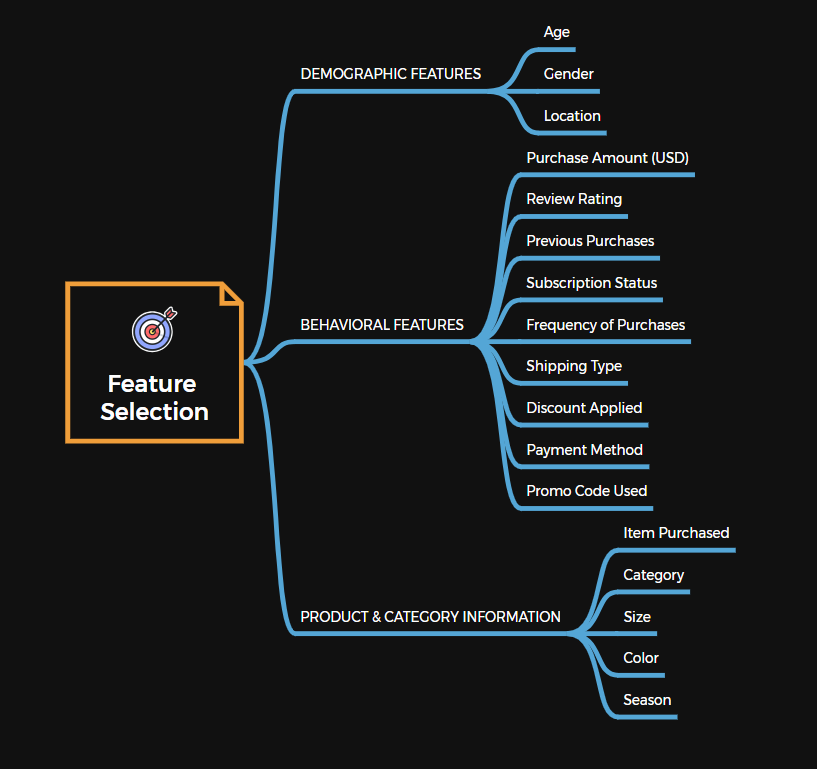

1. Demographic Features

a. Age: Gives insight into the age distribution of customers.

b. Gender: Allows segmentation based on gender differences.

c. Location: Geographic location of customers can be relevant for targeted marketing.

2. Behavioral features

a. Purchase Amount (USD): Indicates the amount customers spend, a key behavioral metric.

b. Review Rating: Reflects customer satisfaction and can be an important factor.

c. Previous Purchases: Shows customer loyalty or engagement.

d. Subscription Status: If applicable, indicates whether a customer is subscribed.

e. Frequency of Purchases: How often customers make purchases.

f. Shipping Type, Discount Applied, Promo Code Used: Logistic and promotional aspects of the purchases.

Payment Method: Type of payment used can provide insights into customer preferences.

3. Product and Category Information

a. Item Purchased and Category: Type of products purchased can lead to segmentation based on product preferences.

b. Size, Color, Season: Details about the products purchased, providing insights into customer preferences.



### Determining number of clusters using elbow method

In [146]:
from sklearn.cluster import KMeans

In [147]:
# Elbow Method to determine the optimal number of clusters (K)
km_inertia = list()
for clust in np.arange(1,21):
    kmeans = KMeans(n_clusters=clust, random_state=42)
    kmeans.fit(X)
    km_inertia.append(kmeans.inertia_)

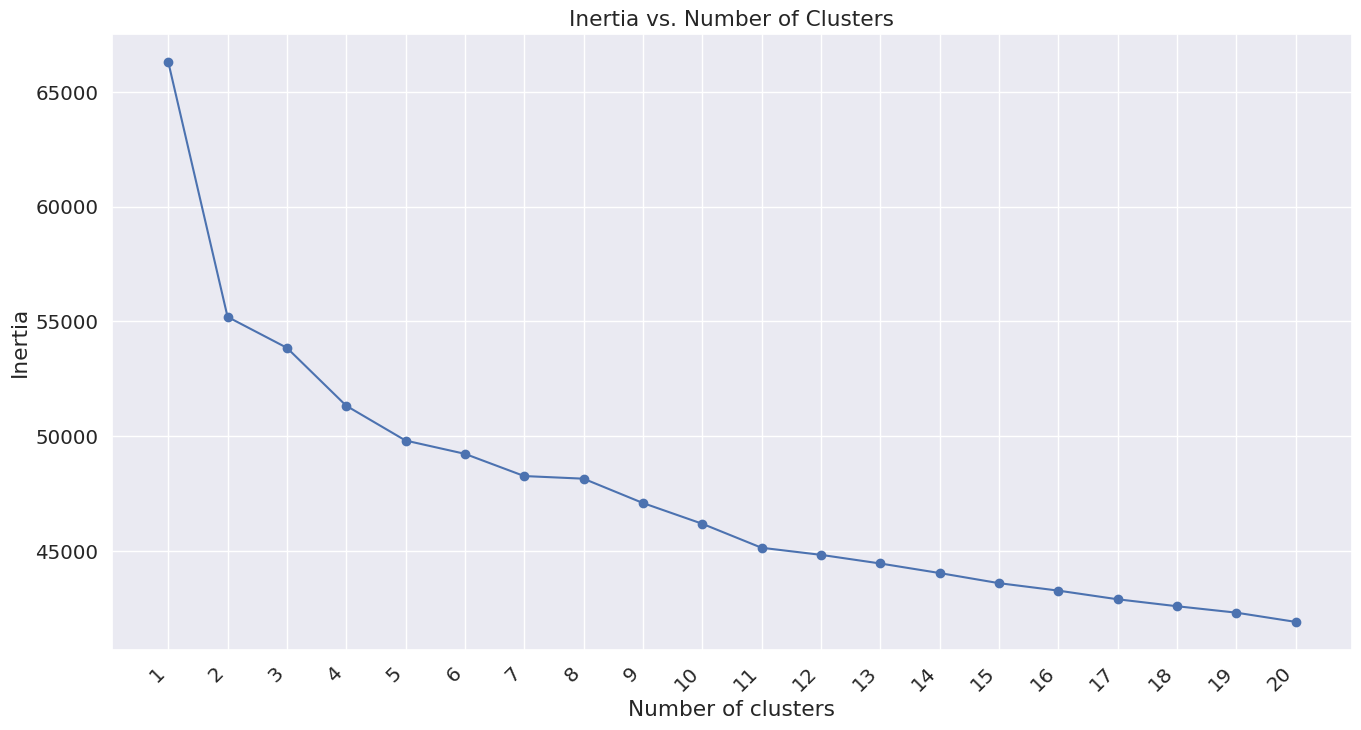

In [148]:
# Plot

plt.figure(figsize=(16, 8))
plt.plot(np.arange(1, 21), km_inertia, marker='o')

# Set x-ticks to ensure all labels are shown
plt.xticks(np.arange(1, 21))
plt.xticks(rotation=45, ha='right')

# Labels and title
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')
plt.show()

The best number of cluster to select using Kmeans algorithm is between 4 to 6 (i.e where the elbow appears and increasing K doesn't significantly reduce WCSS)

### Exploration building clusters with k = 4 , 5 , 6

Cluster algorithm with K = 4

In [149]:
# Choose the optimal number of clusters
optimal_k = 4  # Update with the chosen value from the Elbow Method

# Fit the K-means model
kmeans_model = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters_1 = kmeans_model.fit_predict(X)

# Add cluster labels to the original dataset
data['Cluster1'] = clusters_1

# Check the updated dataset with cluster labels
print("Updated Data with Cluster 1 Labels:")
data.head()

Updated Data with Cluster 1 Labels:


Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  Cluster1  
0          Venmo            Fortnightly         0  
1           Cash            Fortnightly         2  
2    Credit Card                 Weekly         2  
3         PayPal                 Weekly         0  
4         PayPal               Annually         0

In [150]:
data.Cluster1.value_counts()

Cluster1
3    1248
1     975
0     853
2     824
Name: count, dtype: int64

Cluster algorithm with K = 5

In [151]:
# Choose the optimal number of clusters
optimal_k = 5  # Update with the chosen value from the Elbow Method

# Fit the K-means model
kmeans_model = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters_2 = kmeans_model.fit_predict(X)

# Add cluster labels to the original dataset
data['Cluster2'] = clusters_2

# Check the updated dataset with cluster labels
print("Updated Data with Cluster 2 Labels:")
data.head()

Updated Data with Cluster 2 Labels:


Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  Cluster1  Cluster2  
0          Venmo            Fortnightly         0         4  
1           Cash            Fortnightly         2         2  
2    Credit Card                 Weekly         2         2  
3         PayPal                 Weekly         0         4  
4         PayPal               Annually         0         4

In [152]:
data.Cluster2.value_counts()

Cluster2
3    1248
1     975
0     624
4     550
2     503
Name: count, dtype: int64

Cluster algorithm with K = 6

In [153]:
# Choose the optimal number of clusters
optimal_k = 6  # Update with the chosen value from the Elbow Method

# Fit the K-means model
kmeans_model = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters_3 = kmeans_model.fit_predict(X)

# Add cluster labels to the original dataset
data['Cluster3'] = clusters_3

# Check the updated dataset with cluster labels
print("Updated Data with Cluster 3 Labels:")
data.head()

Updated Data with Cluster 3 Labels:


Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  ...  Subscription Status  \
0       Kentucky    L       Gray  Winter  ...                  Yes   
1          Maine    L     Maroon  Winter  ...                  Yes   
2  Massachusetts    S     Maroon  Spring  ...                  Yes   
3   Rhode Island    M     Maroon  Spring  ...                  Yes   
4         Oregon    M  Turquoise  Spring  ...                  Yes   

   Shipping Type Discount Applied Promo Code Used Previous Purchases  \
0        Express              Yes             Yes                 14   
1        Express              Yes             Yes                  2   
2  Free Shipping              Yes             Yes                 23   
3   Next Day Air              Yes             Yes                 49   
4  Free Shipping              Yes             Yes                 31   

   Payment Method Frequency of Purchases Cluster1  Cluster2  Cluster3  
0           Venmo            Fortnightly        0         4         4  
1            Cash            Fortnightly        2         2         5  
2     Credit Card                 Weekly        2         2         2  
3          PayPal                 Weekly        0         4         4  
4          PayPal               Annually        0         4         4  

[5 rows x 21 columns]

In [154]:
data.Cluster3.value_counts()

Cluster3
3    1248
1     975
0     616
4     367
5     348
2     346
Name: count, dtype: int64

# 5. Model Evaluation

K-means clustering is a popular unsupervised machine learning algorithm used for partitioning a dataset into K clusters. Evaluating the performance of a K-means clustering model is essential to understand how well it has grouped the data. The metrics used for evaluating K-means clustering includes:

1. Inertia or Within-Cluster Sum of Squares (WCSS):

a. Inertia represents the sum of squared distances between each data point and its assigned cluster center. Lower inertia indicates tighter clusters.

b. The Elbow Method is often used with WCSS. Plot the WCSS for different values of K, and the "elbow" of the curve is typically the optimal K value where increasing K doesn't significantly reduce WCSS.

2. Silhouette Score:

a. Silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

b. The silhouette score ranges from -1 to 1, and a higher value indicates better-defined clusters. Values near 1 indicate well-separated clusters, while values near 0 indicate overlapping clusters.

3. Visual Inspection:

Visualization can be a powerful tool for evaluating clustering results. Use scatter plots or other visualizations to inspect how well the data points are grouped into clusters.

It's important to note that the choice of evaluation metric depends on the nature of the data and the goals of clustering. In some cases, a combination of metrics may be necessary for a comprehensive assessment of the clustering algorithm's performance. Additionally, keep in mind that K-means is sensitive to the initial placement of cluster centroids, and running the algorithm multiple times with different initializations can help mitigate this sensitivity.


### Inertia or Within-Cluster Sum of Squares (WCSS):

As explored in the previous section, the elbow appears at 4 indicating the best number of cluster to select is 4.

### Silhouette Score:
The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It ranges from -1 to 1, where a high value indicates well-defined clusters.

In [155]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, clusters_1)
print(f"Silhouette Score for k = 4: {silhouette_avg}")

silhouette_avg = silhouette_score(X, clusters_2)
print(f"Silhouette Score for k = 5: {silhouette_avg}")

silhouette_avg = silhouette_score(X, clusters_3)
print(f"Silhouette Score for k = 6: {silhouette_avg}")

Silhouette Score for k = 4: 0.0711563176305713
Silhouette Score for k = 5: 0.07373620311415333
Silhouette Score for k = 6: 0.06989151896623488


Silhouette Score for k=4 is 0.0711, suggesting somewhat overlapping clusters and not totally well-defined separation.

Silhouette Score for k=5 increases slightly to 0.0737, indicating that adding an extra cluster doesn't significantly improve separation.

Silhouette Score for k=6 further decreases to 0.0698, suggesting that an additional cluster may cause more fragmentation, leading to less well-defined clusters.

None of the tested cluster numbers (4, 5, 6) result in highly well-separated clusters based on the silhouette scores. However, k equals to 4 (k=4) yields better results.

Consider exploring a broader range of cluster numbers, alternative clustering algorithms, or visually inspecting the clusters for additional insights.

### Visualize the clusters

In [156]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Add cluster labels to the reduced dataset
data_pca = data.copy()

In [157]:
pd.DataFrame(X_pca)

0         1
0     2.322847 -0.634128
1     2.247999 -0.462385
2     2.312072 -0.013403
3     2.372025 -0.354822
4     2.365129  0.312781
...        ...       ...
3895 -1.780615 -1.229459
3896 -1.794383  0.104682
3897 -1.786220 -0.728712
3898 -1.865410 -0.355493
3899 -1.822376 -0.071953

[3900 rows x 2 columns]

In [158]:
data_pca

Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  ...  \
0                        53       Kentucky    L       Gray  Winter  ...   
1                        64          Maine    L     Maroon  Winter  ...   
2                        73  Massachusetts    S     Maroon  Spring  ...   
3                        90   Rhode Island    M     Maroon  Spring  ...   
4                        49         Oregon    M  Turquoise  Spring  ...   
...                     ...            ...  ...        ...     ...  ...   
3895                     28       Virginia    L  Turquoise  Summer  ...   
3896                     49           Iowa    L      White  Spring  ...   
3897                     33     New Jersey    L      Green  Spring  ...   
3898                     77      Minnesota    S      Brown  Summer  ...   
3899                     81     California    M      Beige  Spring  ...   

      Subscription Status   Shipping Type Discount Applied Promo Code Used  \
0                     Yes         Express              Yes             Yes   
1                     Yes         Express              Yes             Yes   
2                     Yes   Free Shipping              Yes             Yes   
3                     Yes    Next Day Air              Yes             Yes   
4                     Yes   Free Shipping              Yes             Yes   
...                   ...             ...              ...             ...   
3895                   No  2-Day Shipping               No              No   
3896                   No    Store Pickup               No              No   
3897                   No        Standard               No              No   
3898                   No         Express               No              No   
3899                   No    Store Pickup               No              No   

     Previous Purchases  Payment Method Frequency of Purchases Cluster1  \
0                    14           Venmo            Fortnightly        0   
1                     2            Cash            Fortnightly        2   
2                    23     Credit Card                 Weekly        2   
3                    49          PayPal                 Weekly        0   
4                    31          PayPal               Annually        0   
...                 ...             ...                    ...      ...   
3895                 32           Venmo                 Weekly        3   
3896                 41   Bank Transfer              Bi-Weekly        3   
3897                 24           Venmo              Quarterly        3   
3898                 24           Venmo                 Weekly        3   
3899                 33           Venmo              Quarterly        3   

      Cluster2  Cluster3  
0            4         4  
1            2         5  
2            2         2  
3            4         4  
4            4         4  
...        ...       ...  
3895         3         3  
3896         3         3  
3897         3         3  
3898         3         3  
3899         3         3  

[3900 rows x 21 columns]

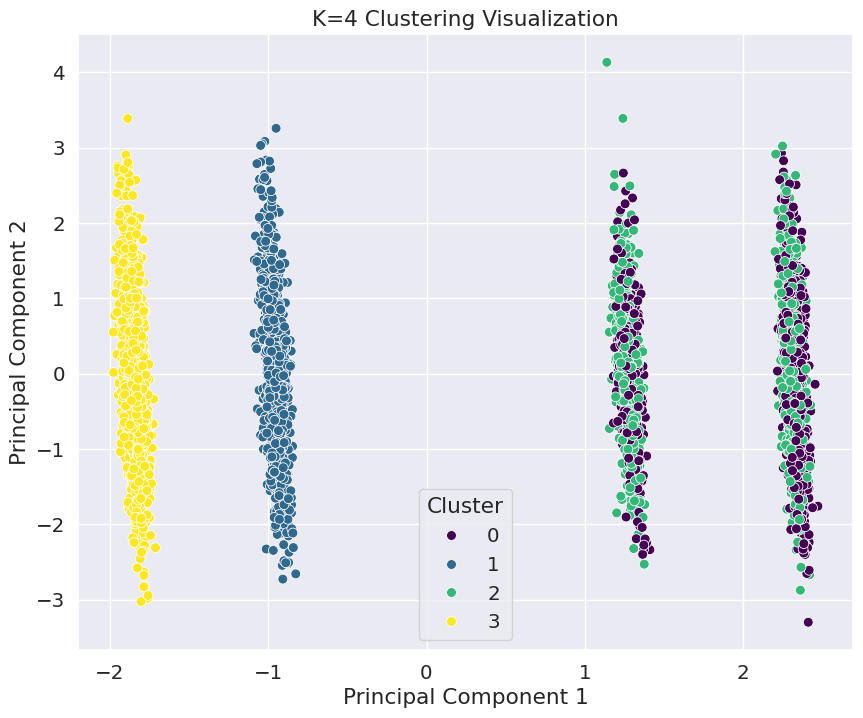

In [159]:
data_pca['Cluster'] = clusters_1

# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data_pca['Cluster'], palette='viridis', s=50)
plt.title('K=4 Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

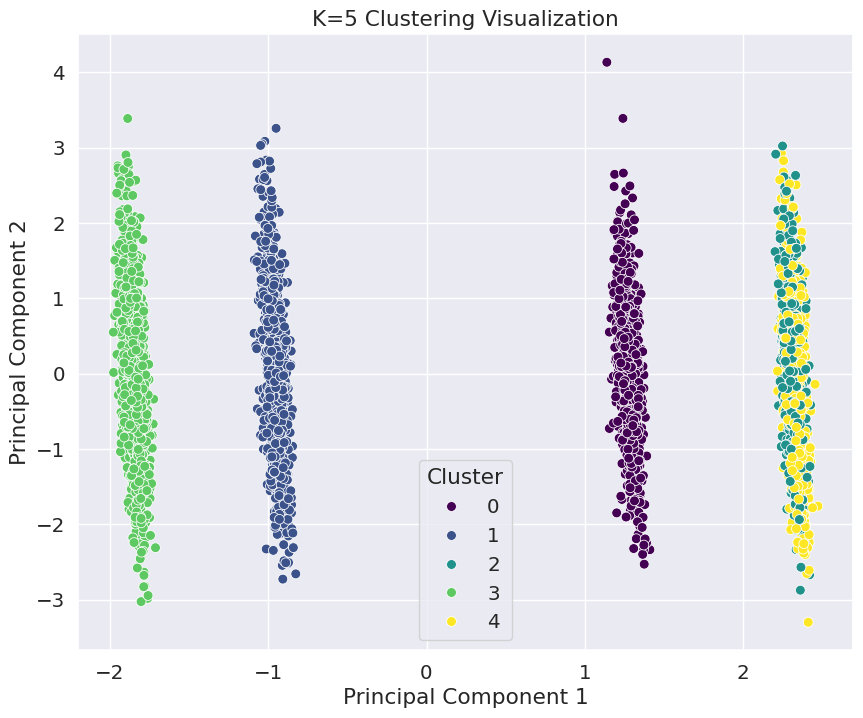

In [160]:
data_pca['Cluster2'] = clusters_2

# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data_pca['Cluster2'], palette='viridis', s=50)
plt.title('K=5 Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

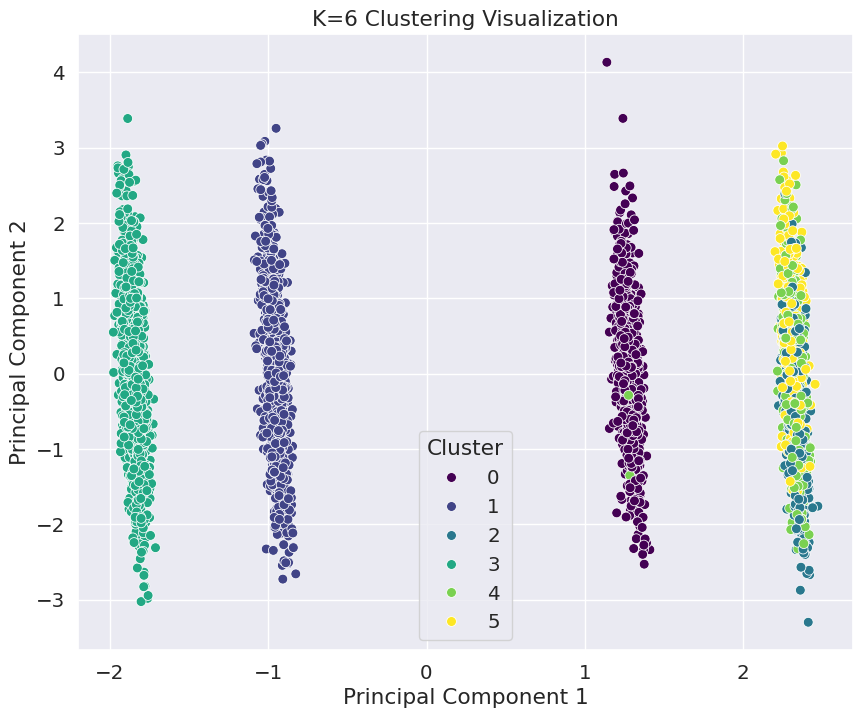

In [161]:
data_pca['Cluster3'] = clusters_3

# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data_pca['Cluster3'], palette='viridis', s=50)
plt.title('K=6 Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [162]:
import plotly.express as px

# Apply PCA to reduce data to 3 dimensions
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

In [163]:
# Create a DataFrame with the reduced data and cluster labels
cluster_df_3d = pd.DataFrame(data={'PC1': X_pca_3d[:, 0], 'PC2': X_pca_3d[:, 1], 'PC3': X_pca_3d[:, 2], 'Cluster': clusters_1})

# Create a 3D scatter plot
fig = px.scatter_3d(cluster_df_3d, x='PC1', y='PC2', z='PC3', color='Cluster',
                    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
                    height=500, width=1000,
                    title='K=4 Clustering in 3D')

# Show the plot
fig.show()

In [164]:
# Create a DataFrame with the reduced data and cluster labels
cluster_df_3d = pd.DataFrame(data={'PC1': X_pca_3d[:, 0], 'PC2': X_pca_3d[:, 1], 'PC3': X_pca_3d[:, 2], 'Cluster': clusters_2})

# Create a 3D scatter plot
fig = px.scatter_3d(cluster_df_3d, x='PC1', y='PC2', z='PC3', color='Cluster',
                    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
                    height=500, width=1000,
                    title='K=5 Clustering in 3D')

# Show the plot
fig.show()

In [165]:
# Create a DataFrame with the reduced data and cluster labels
cluster_df_3d = pd.DataFrame(data={'PC1': X_pca_3d[:, 0], 'PC2': X_pca_3d[:, 1], 'PC3': X_pca_3d[:, 2], 'Cluster': clusters_3})

# Create a 3D scatter plot
fig = px.scatter_3d(cluster_df_3d, x='PC1', y='PC2', z='PC3', color='Cluster',
                    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
                    height=500, width=1000,
                    title='K=6 Clustering in 3D')

# Show the plot
fig.show()

### Results/Insights from visualization

a. K=4: There is a clear and perfect separation between each cluster. Each data point with the same color is grouped together, indicating well-defined and distinct clusters.

b. K=5: While there is some separation between clusters, there is also a mixture, and the clusters are not as clearly separated as in K=4. The distinctiveness of clusters seems to decrease, suggesting a less optimal configuration.

c. K=6: The separation becomes even more unclear, worse than K=5. The clusters appear to overlap, making it challenging to distinguish distinct groups of data points.

Conclusion: Based on the visualization results, it is evident that K=4 is the most suitable number of clusters. It provides clear and well-defined separation between data points, indicating that it captures the underlying structure of the data effectively.

# 6. Feature Optimization for Clusters

To enhance the clustering optimization process, an iterative approach to feature selection was employed. The goal was to identify the most impactful features that result in optimal clustering performance.

In [166]:
data_encoded.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

### Iterative Feature Selection

Iteration 1:

In [167]:
features_for_clustering = data_encoded.columns.drop(['Customer ID'])
X = data_encoded[features_for_clustering]

silhouette_avg = silhouette_score(X, clusters_1)
print(f"Silhouette Score for k = 4: {silhouette_avg}")

Silhouette Score for k = 4: 0.0711563176305713


Iteration 2:

In [168]:
features_for_clustering = ['Age', 'Gender', 'Item Purchased', 'Category', 'Location', 'Season',
                          'Review Rating', 'Subscription Status', 'Shipping Type']
X = data_encoded[features_for_clustering]

silhouette_avg = silhouette_score(X, clusters_1)
print(f"Silhouette Score for k = 4: {silhouette_avg}")

Silhouette Score for k = 4: 0.05426170570950531


Iteration 3:

In [169]:
features_for_clustering = ['Gender', 'Item Purchased', 'Category', 'Subscription Status', 'Discount Applied', 'Promo Code Used']
X = data_encoded[features_for_clustering]

silhouette_avg = silhouette_score(X, clusters_1)
print(f"Silhouette Score for k = 4: {silhouette_avg}")

Silhouette Score for k = 4: 0.22625543831265485


Results from Optimization
After several iterations, it was determined that utilizing the features 'Gender', 'Item Purchased', 'Category', 'Subscription Status', 'Discount Applied', 'Promo Code Used' led to a substantially higher Silhouette Score for k=4, reaching 0.2262 compared to the initial score of 0.0711.

### Using Optimal features

In [170]:
# Choose the optimal number of clusters
optimal_k = 4  # Update with the chosen value from the Elbow Method

# Fit the K-means model
kmeans_model = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans_model.fit_predict(X)

# Add cluster labels to the original dataset
data['Cluster'] = clusters

final_df = data[['Customer ID'] + features_for_clustering + ['Cluster']]
final_df

Customer ID  Gender Item Purchased     Category Subscription Status  \
0               1    Male         Blouse     Clothing                 Yes   
1               2    Male        Sweater     Clothing                 Yes   
2               3    Male          Jeans     Clothing                 Yes   
3               4    Male        Sandals     Footwear                 Yes   
4               5    Male         Blouse     Clothing                 Yes   
...           ...     ...            ...          ...                 ...   
3895         3896  Female         Hoodie     Clothing                  No   
3896         3897  Female       Backpack  Accessories                  No   
3897         3898  Female           Belt  Accessories                  No   
3898         3899  Female          Shoes     Footwear                  No   
3899         3900  Female        Handbag  Accessories                  No   

     Discount Applied Promo Code Used  Cluster  
0                 Yes             Yes        2  
1                 Yes             Yes        2  
2                 Yes             Yes        2  
3                 Yes             Yes        2  
4                 Yes             Yes        2  
...               ...             ...      ...  
3895               No              No        1  
3896               No              No        1  
3897               No              No        1  
3898               No              No        1  
3899               No              No        1  

[3900 rows x 8 columns]

In [171]:
final_df.Cluster.value_counts()

Cluster
1    1248
2    1053
3     975
0     624
Name: count, dtype: int64

Final Visualization

In [172]:
# Apply PCA to reduce data to 3 dimensions
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

In [173]:
# Create a DataFrame with the reduced data and cluster labels
cluster_df_3d = pd.DataFrame(data={'PC1': X_pca_3d[:, 0], 'PC2': X_pca_3d[:, 1], 'PC3': X_pca_3d[:, 2], 'Cluster': clusters})

# Create a 3D scatter plot
fig = px.scatter_3d(cluster_df_3d, x='PC1', y='PC2', z='PC3', color='Cluster',
                    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
                    height=500, width=1000,
                    title='K=4 Clustering in 3D')

# Show the plot
fig.show()

# 7. Cluster Analysis

Dataframe for Cluster 0

In [203]:
final_df[final_df['Cluster'] == 0].head()
# Displaying samples from Cluster 0

Customer ID Gender Item Purchased   Category Subscription Status  \
1053         1054   Male         Blouse   Clothing                  No   
1054         1055   Male         Shorts   Clothing                  No   
1055         1056   Male         Jacket  Outerwear                  No   
1056         1057   Male        Sweater   Clothing                  No   
1057         1058   Male         Jacket  Outerwear                  No   

     Discount Applied Promo Code Used  Cluster  
1053              Yes             Yes        0  
1054              Yes             Yes        0  
1055              Yes             Yes        0  
1056              Yes             Yes        0  
1057              Yes             Yes        0

Dataframe for Cluster 1

In [204]:
final_df[final_df['Cluster'] == 1].head()
# Displaying samples from Cluster 1

Customer ID  Gender Item Purchased     Category Subscription Status  \
2652         2653  Female         Shorts     Clothing                  No   
2653         2654  Female         Blouse     Clothing                  No   
2654         2655  Female           Coat    Outerwear                  No   
2655         2656  Female     Sunglasses  Accessories                  No   
2656         2657  Female         Shorts     Clothing                  No   

     Discount Applied Promo Code Used  Cluster  
2652               No              No        1  
2653               No              No        1  
2654               No              No        1  
2655               No              No        1  
2656               No              No        1

Dataframe for Cluster 2

In [205]:
final_df[final_df['Cluster'] == 2].head()
# Displaying samples from Cluster 2

Customer ID Gender Item Purchased  Category Subscription Status  \
0            1   Male         Blouse  Clothing                 Yes   
1            2   Male        Sweater  Clothing                 Yes   
2            3   Male          Jeans  Clothing                 Yes   
3            4   Male        Sandals  Footwear                 Yes   
4            5   Male         Blouse  Clothing                 Yes   

  Discount Applied Promo Code Used  Cluster  
0              Yes             Yes        2  
1              Yes             Yes        2  
2              Yes             Yes        2  
3              Yes             Yes        2  
4              Yes             Yes        2

Dataframe for Cluster 3

In [206]:
final_df[final_df['Cluster'] == 3].head()
# Displaying samples from Cluster 3

Customer ID Gender Item Purchased  Category Subscription Status  \
1677         1678   Male          Jeans  Clothing                  No   
1678         1679   Male          Pants  Clothing                  No   
1679         1680   Male          Dress  Clothing                  No   
1680         1681   Male          Shoes  Footwear                  No   
1681         1682   Male       Sneakers  Footwear                  No   

     Discount Applied Promo Code Used  Cluster  
1677               No              No        3  
1678               No              No        3  
1679               No              No        3  
1680               No              No        3  
1681               No              No        3

In [184]:
final_df.columns

Index(['Customer ID', 'Gender', 'Item Purchased', 'Category',
       'Subscription Status', 'Discount Applied', 'Promo Code Used',
       'Cluster'],
      dtype='object')

In [187]:
# categorical features
categorical_features = ['Gender', 'Item Purchased', 'Category',
                         'Subscription Status',  'Discount Applied',
                         'Promo Code Used']

### A. Visualizing feature mapping of Cluster 0

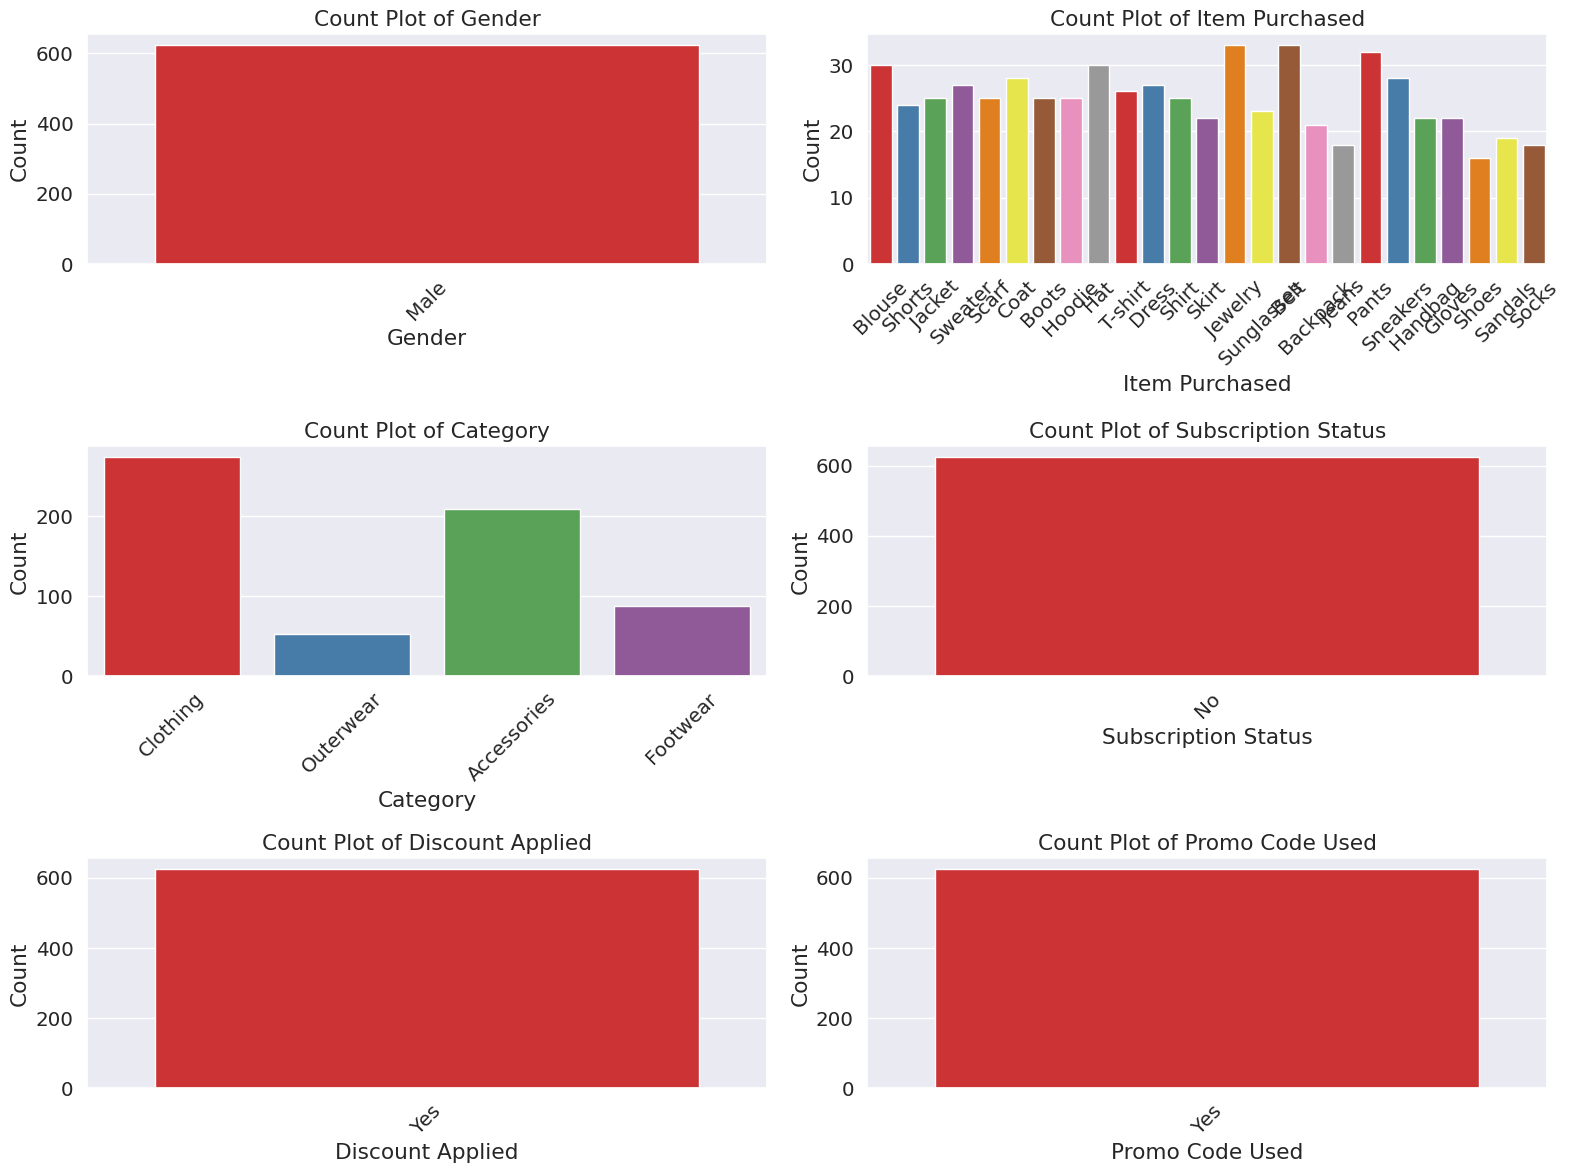

In [199]:
# Assuming 'categorical_features' is a list of categorical column names
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))  # Create a 3x2 grid for plots
axes = axes.flatten()  # Flatten to easily iterate

# Loop through each feature and corresponding subplot axis
for i, column in enumerate(categorical_features):
    if i >= len(axes):  # Stop if we have more columns than axes
        break

    ax = axes[i]  # Get the axis to plot in

    # Count plot
    sns.countplot(x=column, data=final_df[final_df['Cluster'] == 0], palette='Set1', ax=ax)
    ax.set_title(f'Count Plot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)


# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to prevent overlaps
plt.show()

Cluster 0 : Summarization

Male shoppers , mainly buying Clothing and Accessories , not subscribed but discount concious

### B. Visualizing feature mapping of Cluster 1

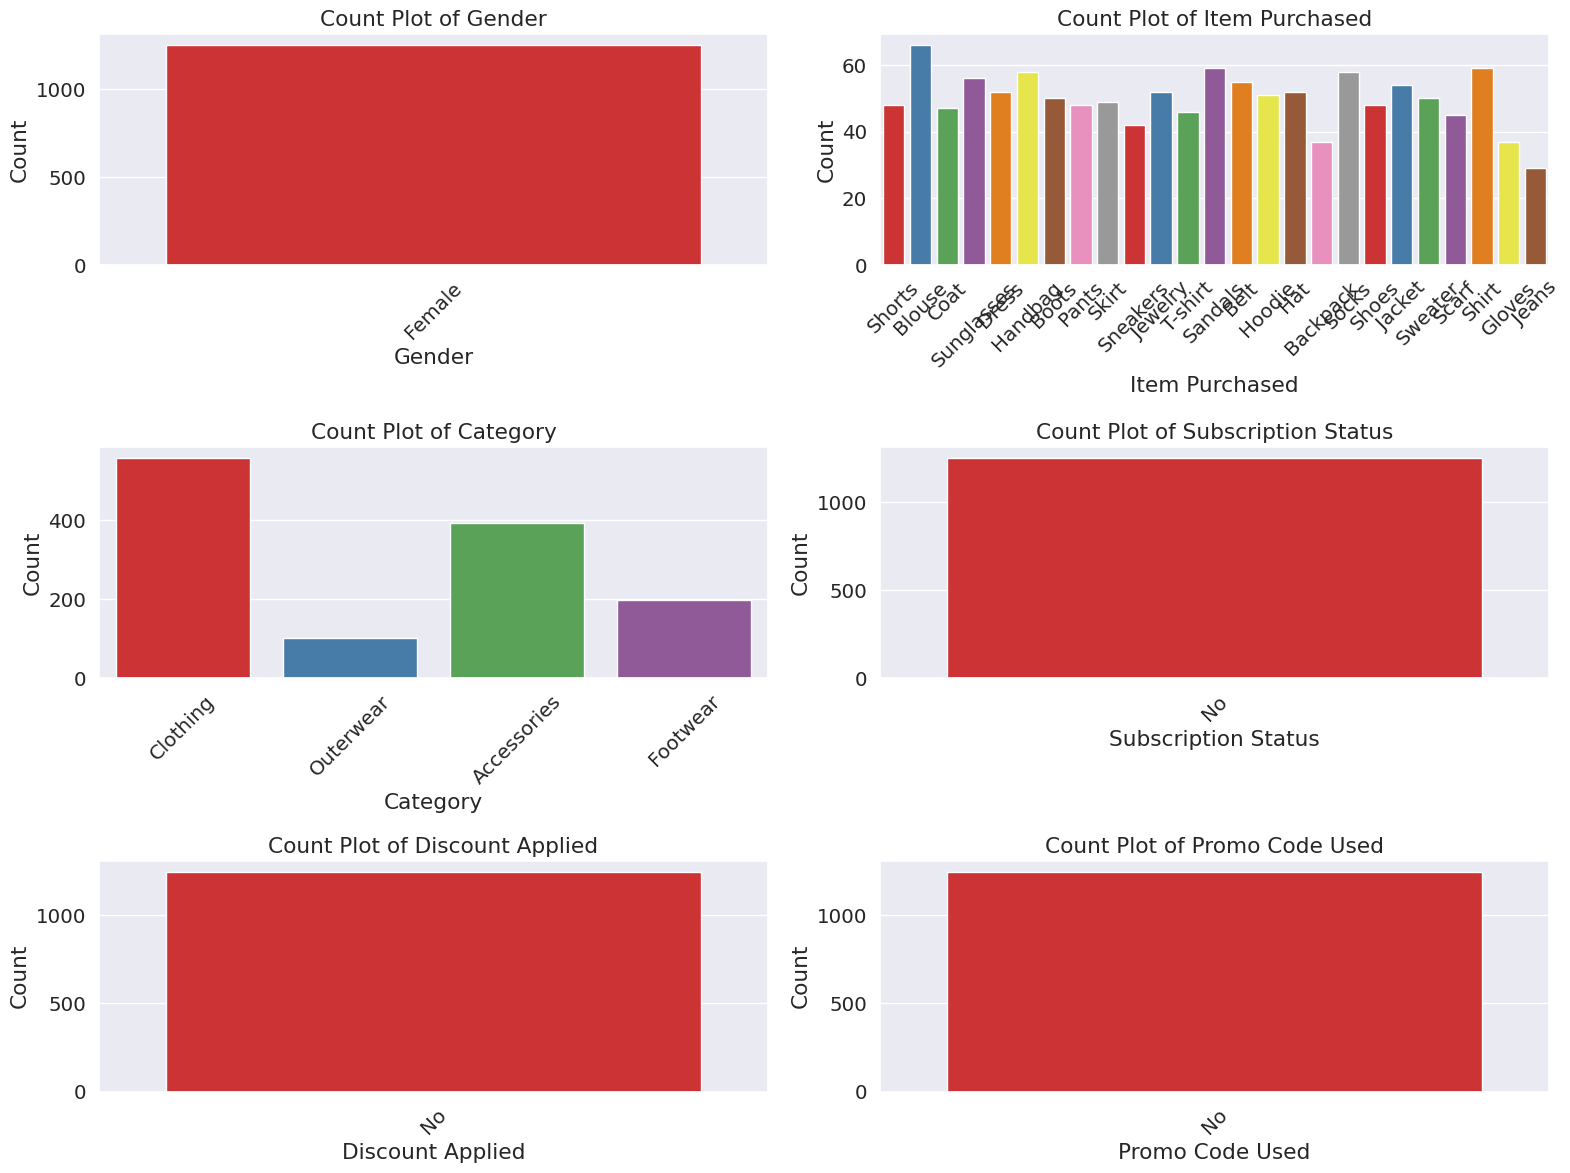

In [200]:
# Assuming 'categorical_features' is a list of categorical column names
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))  # Create a 3x2 grid for plots
axes = axes.flatten()  # Flatten to easily iterate

# Loop through each feature and corresponding subplot axis
for i, column in enumerate(categorical_features):
    if i >= len(axes):  # Stop if we have more columns than axes
        break

    ax = axes[i]  # Get the axis to plot in

    # Count plot
    sns.countplot(x=column, data=final_df[final_df['Cluster'] == 1], palette='Set1', ax=ax)
    ax.set_title(f'Count Plot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)


# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to prevent overlaps
plt.show()

Summary : Cluster 1 ( Price insensitive female buyers )

The cluster 1 comprises of Woman who mainly buys Clothing and accessories , not subscribed and doesn't wait for discounts

### C. Visualizing feature mapping of Cluster 2

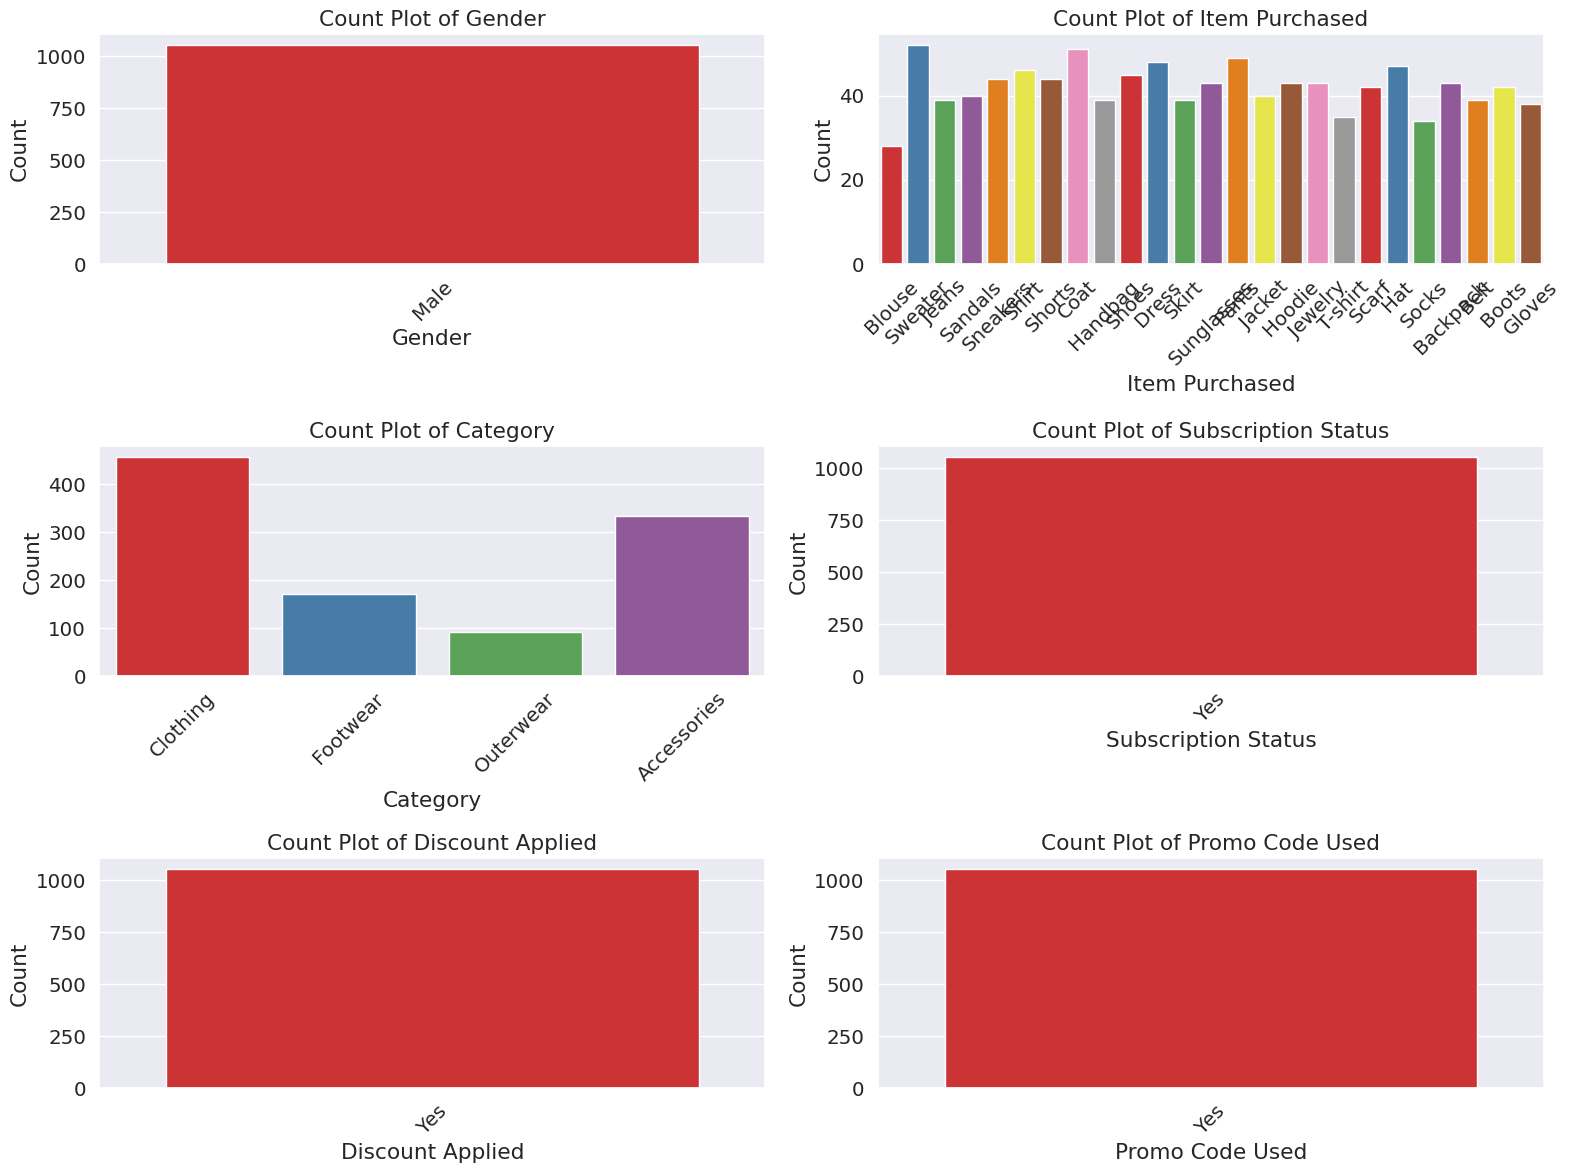

In [201]:
# Assuming 'categorical_features' is a list of categorical column names
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))  # Create a 3x2 grid for plots
axes = axes.flatten()  # Flatten to easily iterate

# Loop through each feature and corresponding subplot axis
for i, column in enumerate(categorical_features):
    if i >= len(axes):  # Stop if we have more columns than axes
        break

    ax = axes[i]  # Get the axis to plot in

    # Count plot
    sns.countplot(x=column, data=final_df[final_df['Cluster'] == 2], palette='Set1', ax=ax)
    ax.set_title(f'Count Plot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)


# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to prevent overlaps
plt.show()

Summary : Cluster 2 ( Price sensitive male buyers )

The cluster 2 comprises of Men who mainly buys Clothing and accessories , fully subscribed , buys only on discount

### D. Visualizing feature mapping of Cluster 3

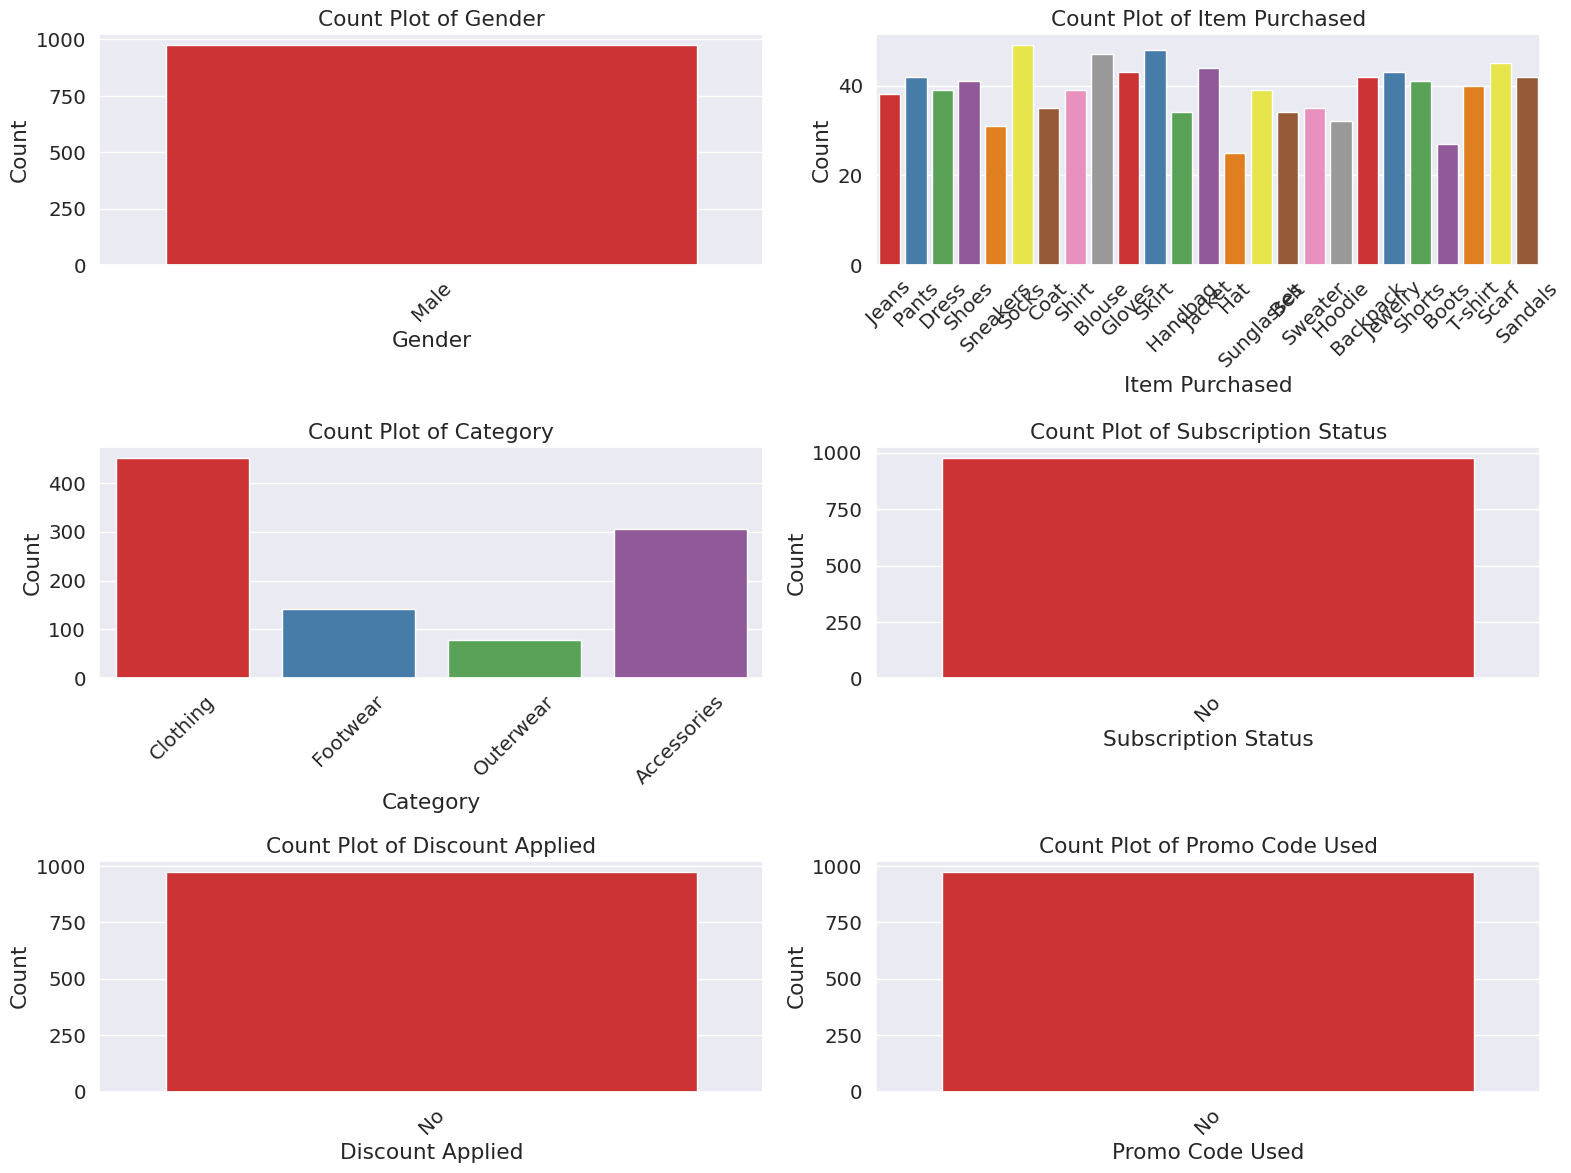

In [202]:
# Assuming 'categorical_features' is a list of categorical column names
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))  # Create a 3x2 grid for plots
axes = axes.flatten()  # Flatten to easily iterate

# Loop through each feature and corresponding subplot axis
for i, column in enumerate(categorical_features):
    if i >= len(axes):  # Stop if we have more columns than axes
        break

    ax = axes[i]  # Get the axis to plot in

    # Count plot
    sns.countplot(x=column, data=final_df[final_df['Cluster'] == 3], palette='Set1', ax=ax)
    ax.set_title(f'Count Plot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)


# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to prevent overlaps
plt.show()

Summary : Cluster 3

The cluster 3 comprises of Men who mainly buys Clothing and accessories , not subscribed and not price sensitive

### Summarizing the clusters

Cluster 0 : Male shoppers , mainly buying Clothing and Accessories , not subscribed but discount concious

Cluster 1 : Female shopper who mainly buys Clothing and accessories , not subscribed and doesn't wait for discounts

Cluster 2 : Men shopper who mainly buys Clothing and accessories , fully subscribed , buys only on discount

Cluster 3 :  Men shopper who mainly buys Clothing and accessories , not subscribed and not price sensitive

Their are substantial overlap between Cluster 0 and 2 , mainly men interested in Clothing and accessories and price concious . Marketing strategies will be very similar to them .

Cluster 1 and 3 are price insensitive buyers , high end branded products can be pushed to them to increase the AOV ( average order value )